# Workshop - Differential equations
Mathematics for cognitive studies/Cogmaster maths club. Class by Constantin Vaillant-Tenzer.

In [2]:
import numpy as np # import the library
import pylab as pyl
import matplotlib.pyplot as plt
import scipy as scp
import random

In [3]:
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## Exercise 1: The drift diffusion model of decision-making.
In a two-alternative forced choice task (2AFC-task), subjects are asked to choose between two alternative actions. We will here consider the case where a subject receives a visual motion stimulus (a
set of points on a screen that are moving in different directions) and then needs to indicate whether
the points were moving upwards or downwards. If such a motion stimulus is ambiguous or “noisy”,
the task can be quite difficult. We will assume that the motion stimulus continues until the subject
has made a choice. This scenario is well described by the “drift-diffusion-model”, in which the sub-
ject compares the firing rate $m_A$ of an upward-motion sensitive neuron with the firing rate $m_B$ of a
downward-motion sensitive neuron and integrates the difference between the two,
$$\dfrac{dx}{dt} = m_A − m_B + \sigma \eta (t)$$
where $\eta (t)$ is a noise term (Gaussian white noise with unit standard deviation) that simulates the
noisiness of real neurons. If the integration variable $x$ surpasses a threshold $\mu$, then the subject decides
for outcome $A$; if $x$ decreases below a threshold $−\mu$, then the subject decides for outcome $B$.

Any ordinary differential equation can be solved numerically using the Euler method, i.e., using
the approximation
$$x(t + \Delta t) = x(t) +  ̇x \Delta t $$
For stochastic differential equations, i.e., those that have a noise-term, the random part grows with the
square root of the time step, a technical issue that you can ignore for now. It leads to the following
discrete approximation of the drift-diffusion-model:
$$x(t + \Delta t) = x(t) + (m_A − m_B ) \Delta t + \sigma \eta (t) \sqrt{∆t}$$

(a) Assume $m_A = 1$ and $m_B = 0.95$. Plot several runs of the drift-diffusion-model, always starting
with $x(0) = 0$. Choose a stepwidth of $\Delta t = 0.1$ ms, a noise level $\sigma = 0.5$ ms$^{− \frac{1}{2}}$ and iterate the
Euler method over 10000 time steps up to time $t = 1$ s. You should choose a reasonable value for the
threshold $\mu$.

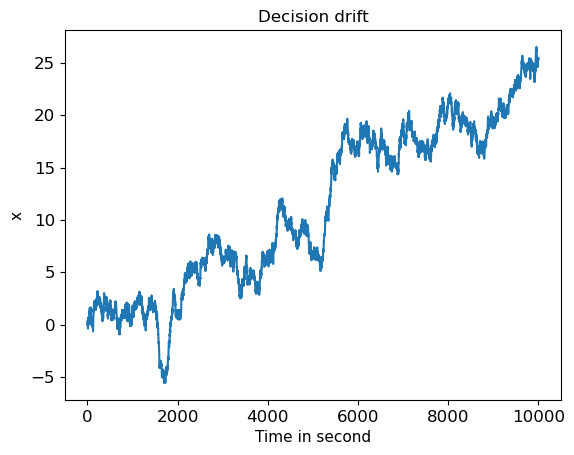

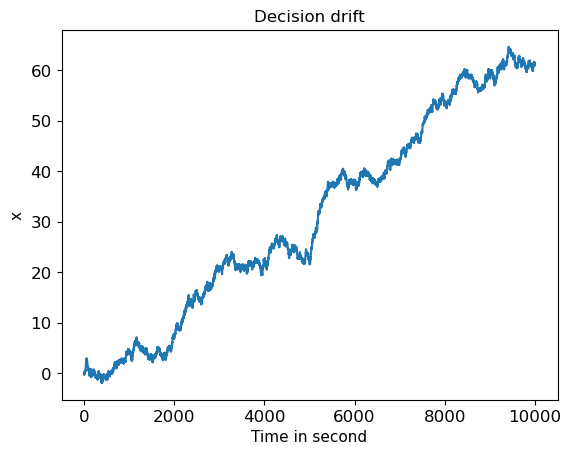

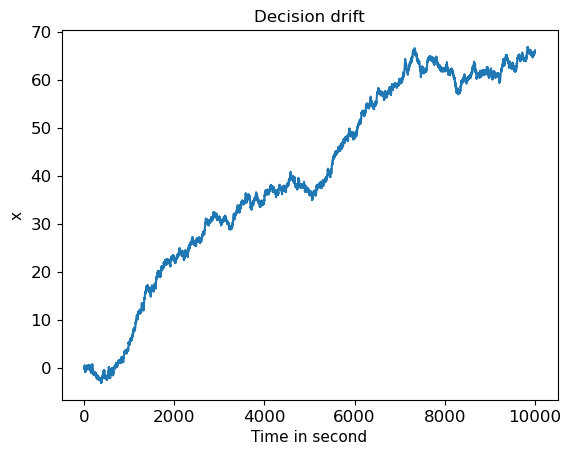

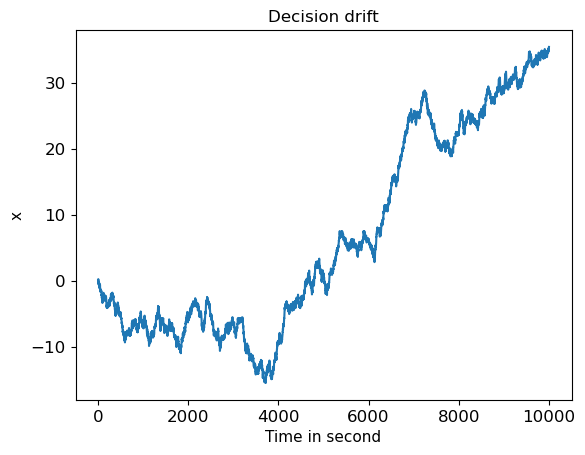

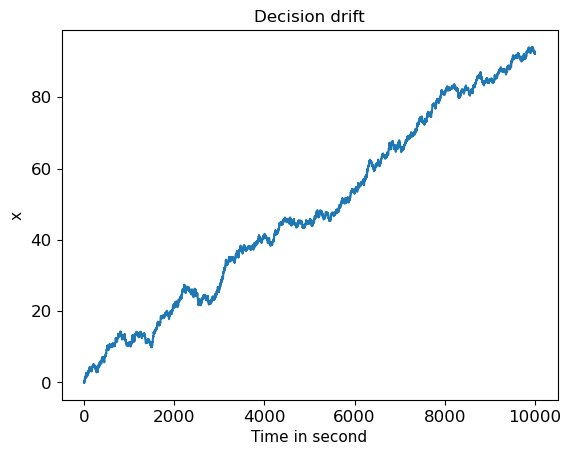

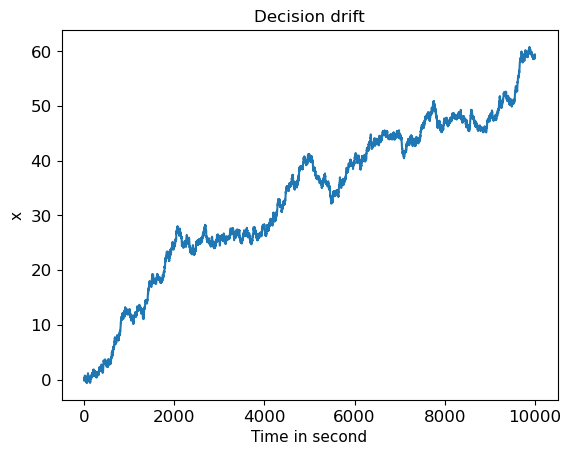

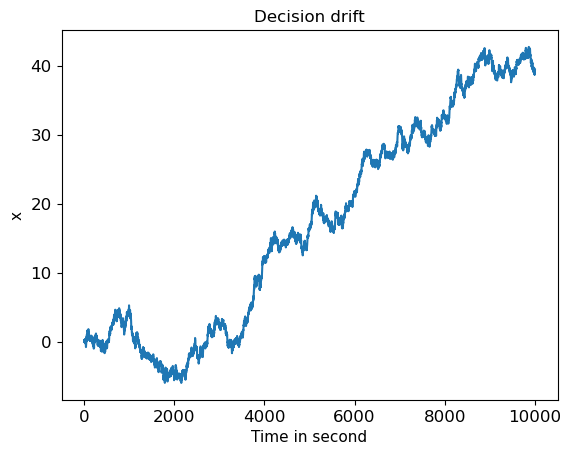

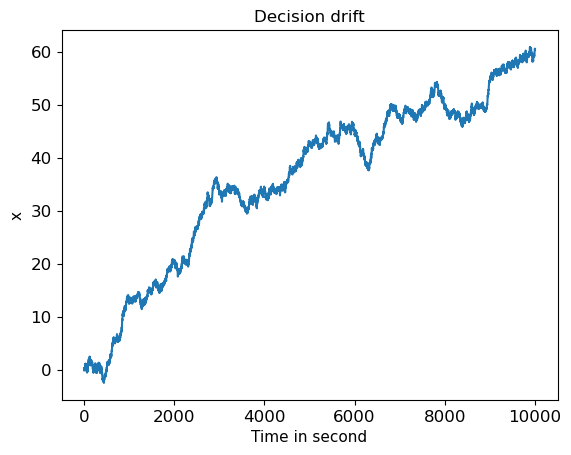

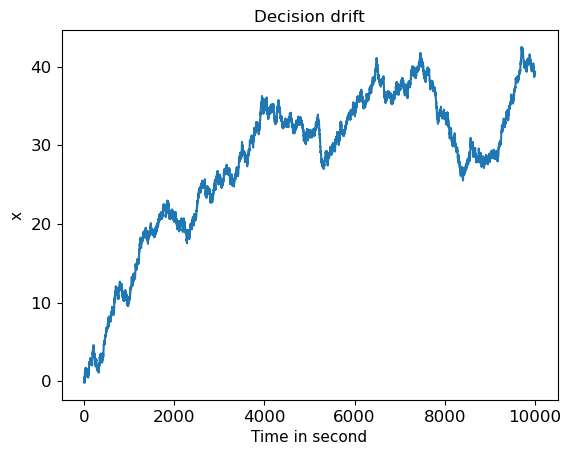

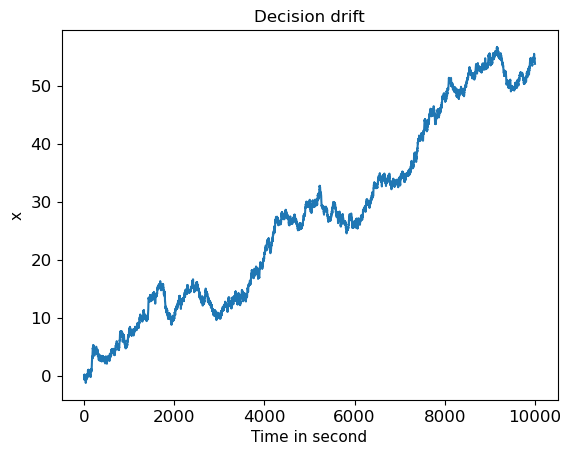

In [3]:
ma = 1
mb = 0.95
delta_t = 0.1
sigma = 0.5
step = 1

for k in range(10) :
    x = #Your code
    t = #Your code

    #Your code (Euler's method)

    plt.title("Decision drift")
    plt.xlabel("Time in second")
    plt.ylabel("x")
    plt.plot(t, x)
    plt.show()

b) Run the model 1000 times and store the outcome ($A$ vs. $B$) and the time of threshold crossing,
ti in each run. Assume that the reaction time of the subject is given by $RT_i = 100$ ms $+ t_i$. Plot the
distribution of reaction times for outcome $A$ and the distribution for outcome $B$.

Programming Help: *Run the program with a smaller amount of trials first; once it’s working, go to
the number of trials asked for!*

In [4]:
ma = 1
mb = 0.95
delta_t = 0.1
sigma = 0.5
step = 1
outcomeA = []
outcomeB = []
mu = #your choice
ntest = 1000

#your code

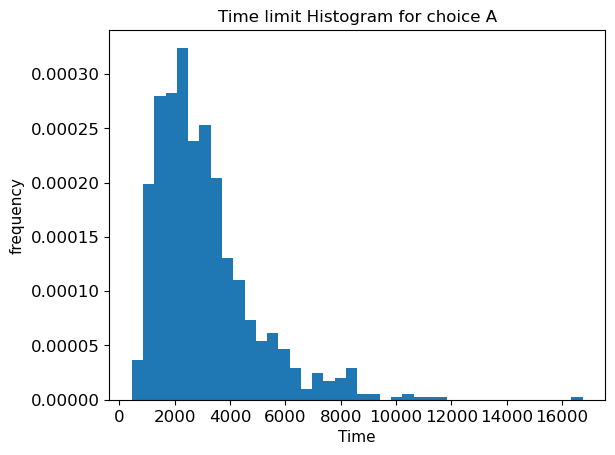

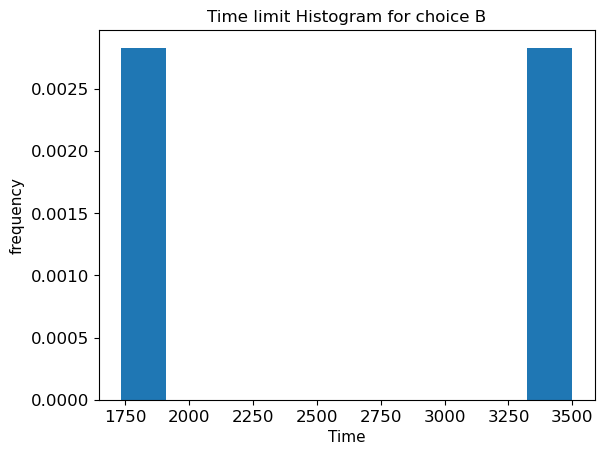

In [5]:
plt.hist(outcomeA, bins=40, density = True)
plt.gca().set(title='Time limit Histogram for choice A', ylabel = 'frequency', xlabel='Time');
plt.show()

plt.hist(outcomeB, bins=10, density = True)
plt.gca().set(title='Time limit Histogram for choice B', ylabel = 'frequency', xlabel='Time');
plt.show()

(c) We will denote the evidence for outcome A versus outcome B as $m_E = m_A − m_B$ . Plot the
probability of outcome $A$ for values of $m_E$ ranging from -0.2 to 0.2. Compare the results of your
simulation with the analytical formula, which states that the probability of choosing $B$ is given by 
$$p_b = \dfrac{1}{1 + \exp (\beta (m_A - m_B ))} $$

where $\beta = 2\mu / \sigma^2$.

In [6]:
me = np.linspace(-2, 2, 100)
pb = 1 / (1 + np.exp((2*mu / sigma**2) * me))
ntest = 1000
probas = np.zeros(len(me))

for j in range(len(probas)) :
    compt = 0
    for i in range(ntest) :
        x = 0
        go = True
        while go :
            nu = random.gauss(0, 1)
            x += me[j] * delta_t + sigma * nu * np.sqrt(delta_t)
            if x > mu :
                go = False
            if x < -mu :
                compt += 1
                go = False
    probas[j] = compt / ntest

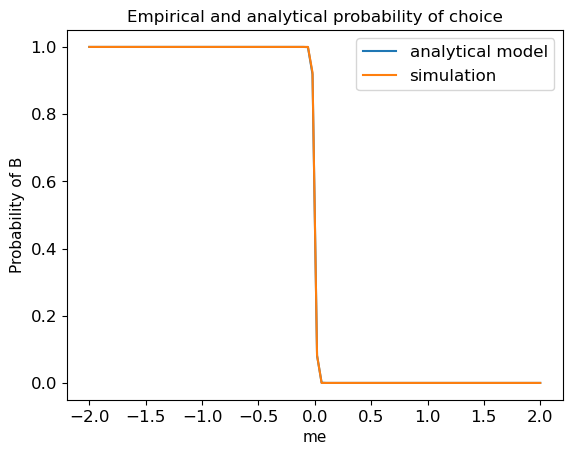

In [7]:
plt.title("Empirical and analytical probability of choice")
plt.xlabel("me")
plt.ylabel("Probability of B")
plt.plot(me, pb, label = "analytical model")
plt.plot(me, probas, label = "simulation")
plt.legend()
plt.show()

## Exercise 2: Integrate-and-Fire neuron

Next, we want to investigate a simple model of how real neurons create action potentials. In a
second step, we want to build a simple model of how the vibratory stimulus from Exercise (2) can be
translated into a spike train.

(a) We will start by simulating the voltage across a neuron’s membrane when a current $I = 1$ nA
is injected. For a passive membrane, the voltage is given by the differential equation,
$$C \dfrac{dV (t)}{dt} = g_L (E_L − V (t)) + I $$

where $C = 1$ nF is the membrane capacitance, $g_L = 0.1$ μS is the conductance of the membrane
(“leak” conductance), and $E_L = −70$ mV its reversal potential. This equation (and any other differential equation) can be solved numerically using the Euler method, i.e., using the approximation
$$V (t + \Delta t) = V (t) + \dfrac{dV (t)}{dt} \Delta t $$

Your task will be to implement this method for the above differential equation with initial condition
$V (0) = E_L$. Choose a stepwidth of ∆t = 1 ms and iterate the Euler method over 100 time steps up
to time t = 100 ms.


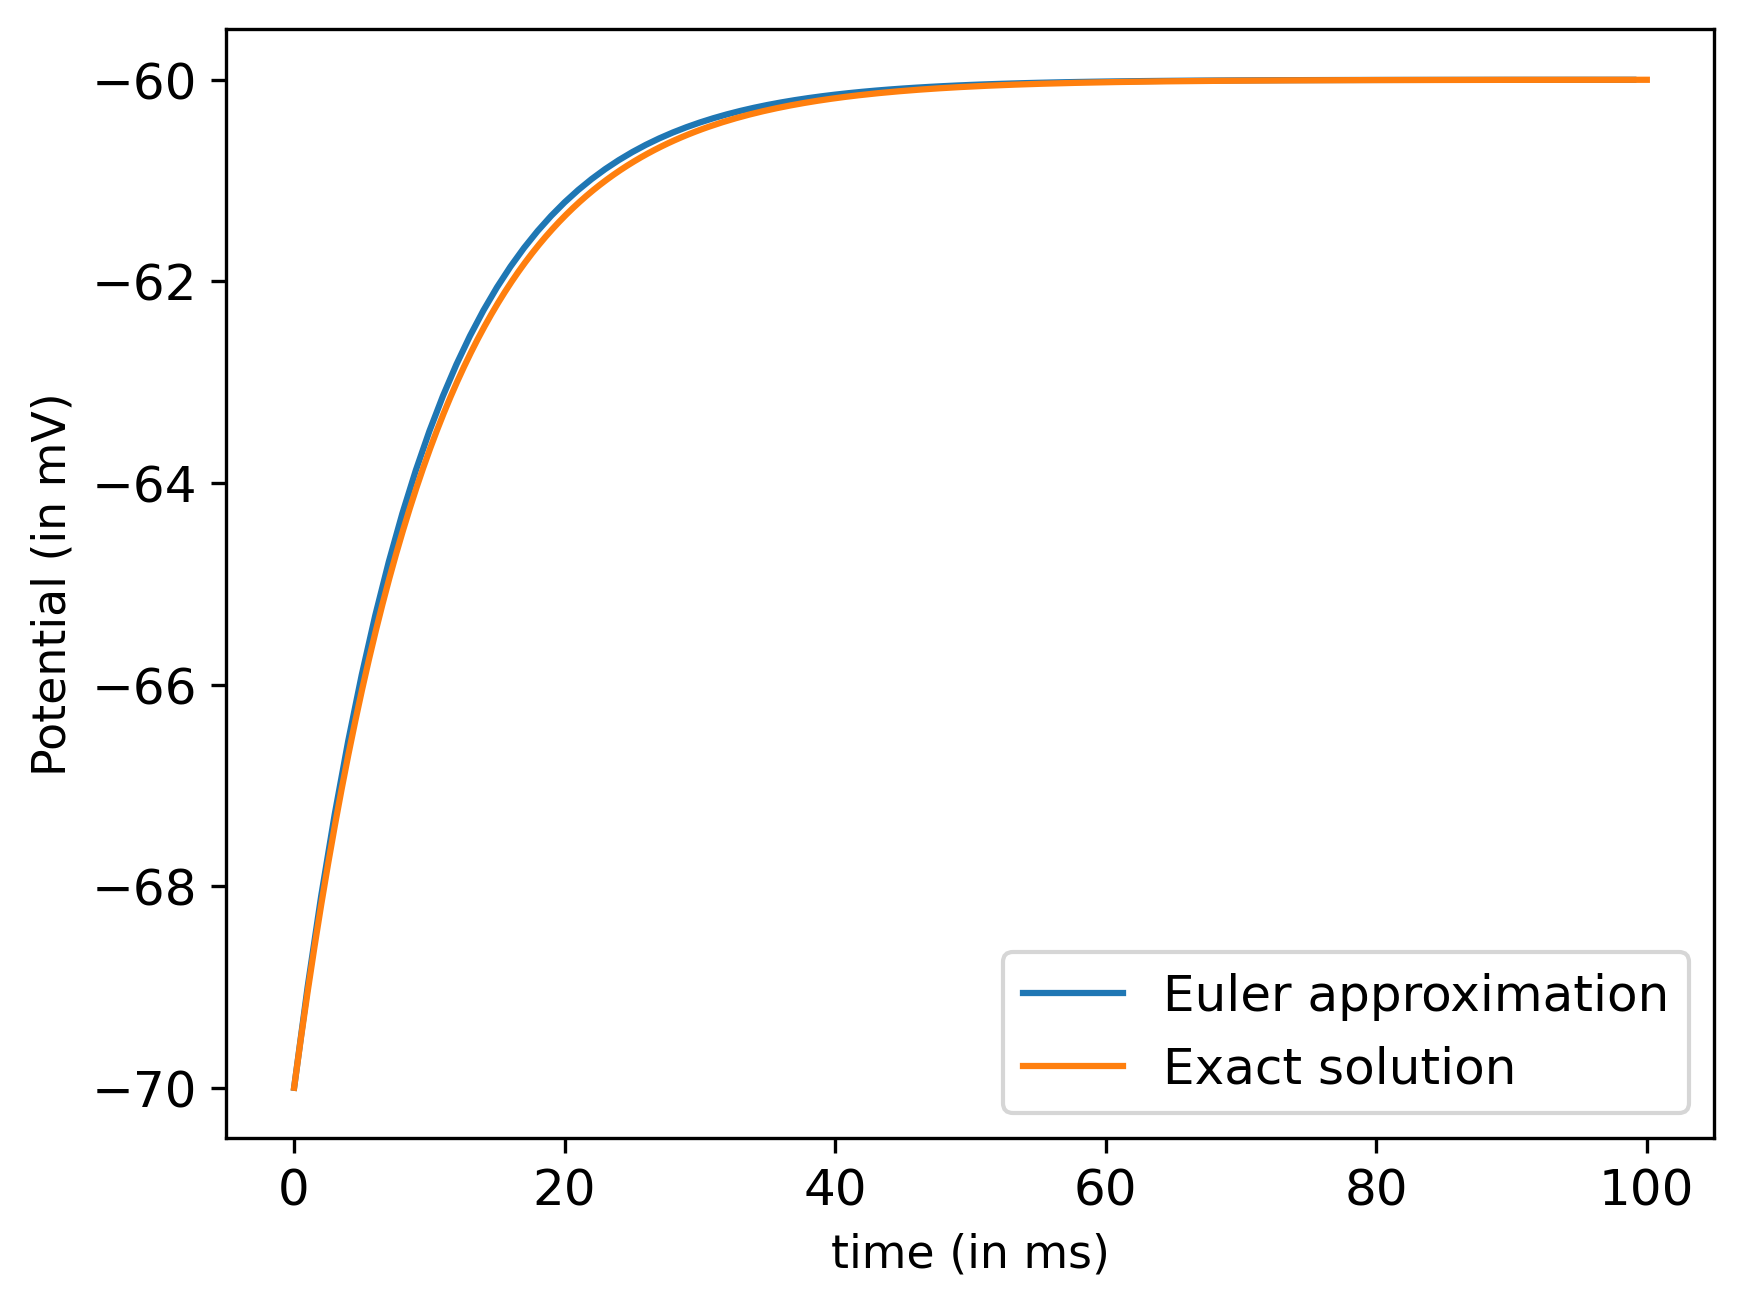

In [6]:
plt.figure(dpi = 300)

C = 1
gl = 0.1
el = -70
deltat = 1
t = 100
I = 1

V = np.zeros(t)

V[0] = el

for step in range(1, t) :
    V[step] = #your code

def exact(x) :
    return #your code
    
x = np.linspace(0,100, 200)
plt.plot(V, label = "Euler approximation")
plt.plot(x, exact(x), label = "Exact solution")
plt.xlabel("time (in ms)")
plt.ylabel("Potential (in mV)")
plt.savefig("euler.png")
plt.legend()
plt.show()
    

(b) What happens if you change the input current $I$ ?


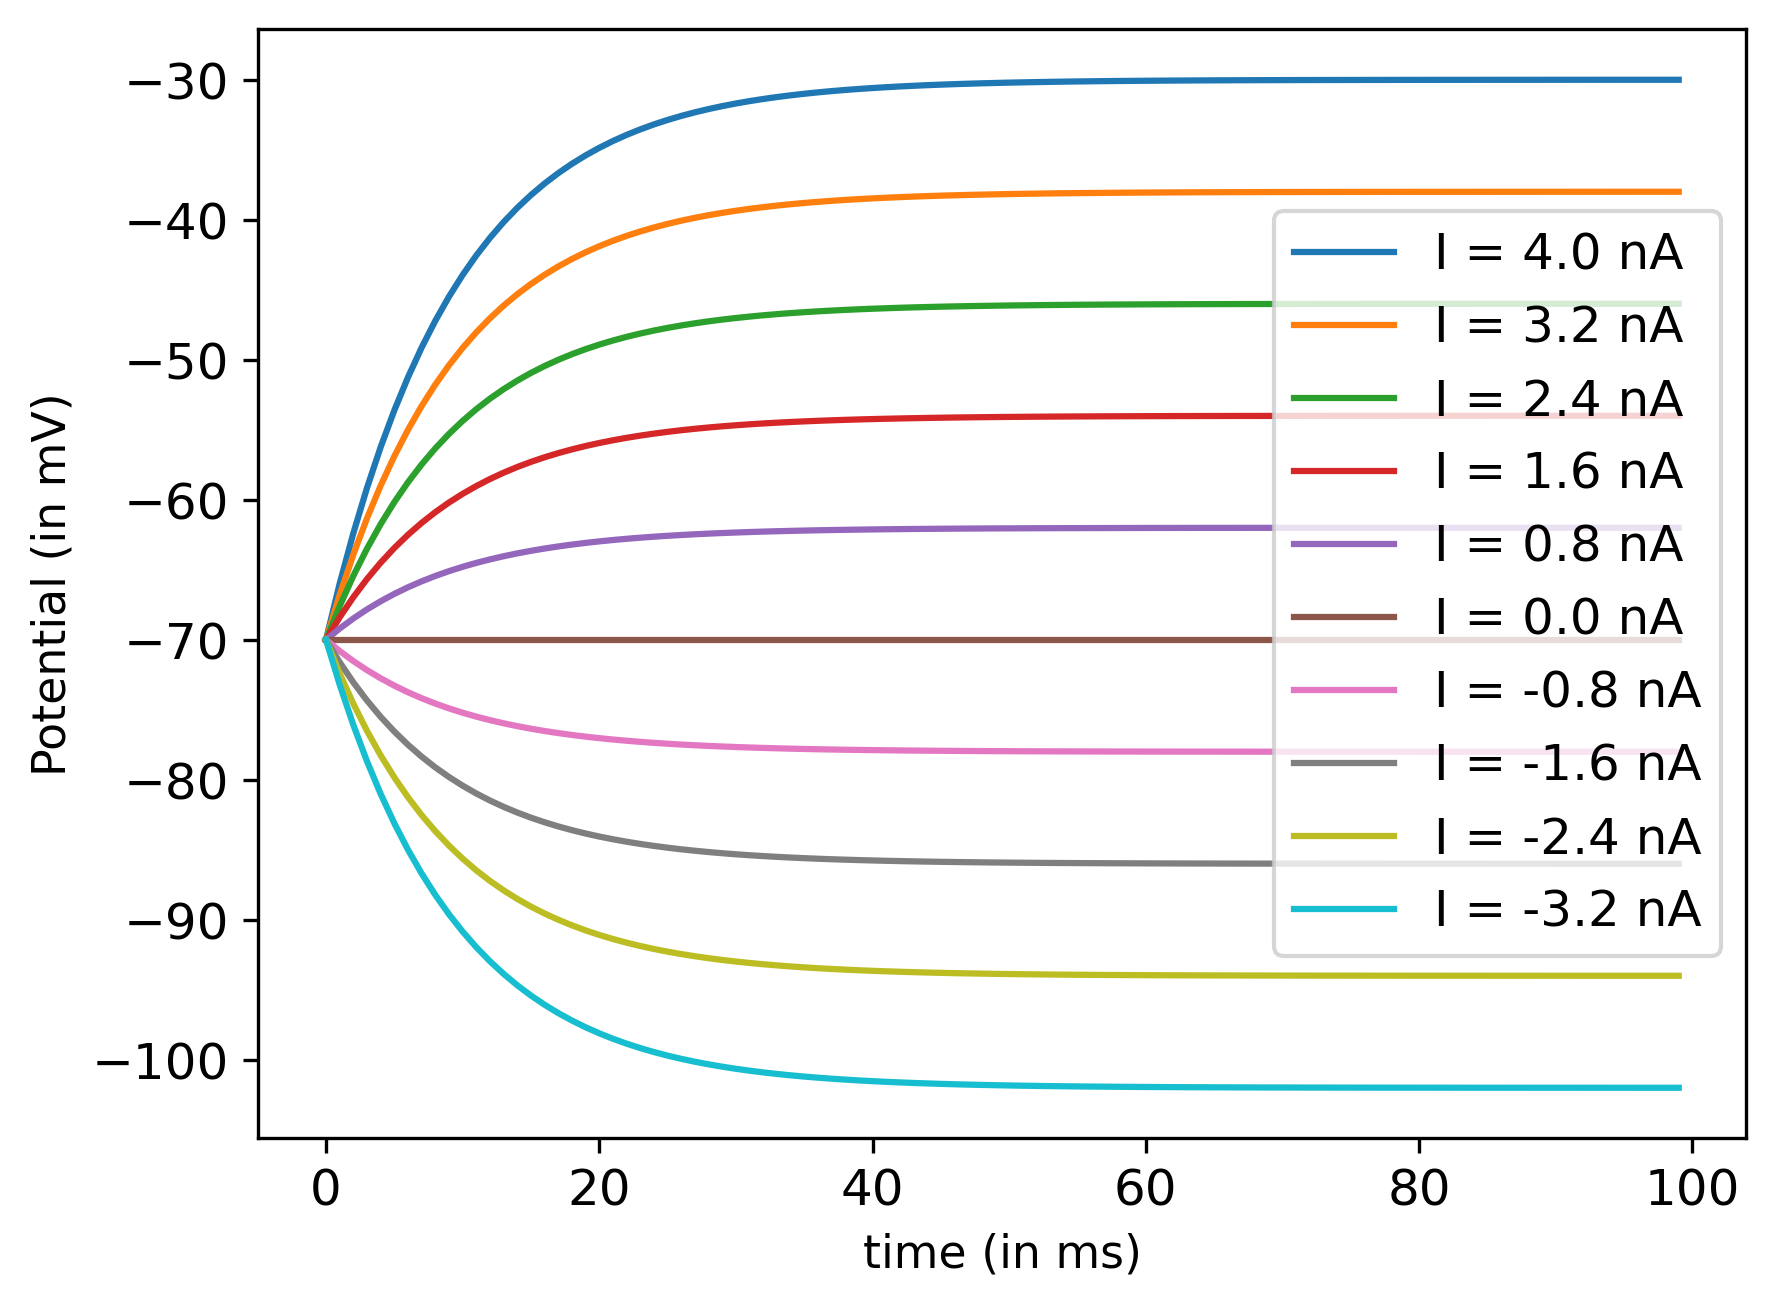

In [7]:
plt.figure(dpi = 300)
for I in range(5, -5, -1) :
    #your code
    #
    plt.plot(V, label = string)
    
plt.xlabel("time (in ms)")
plt.ylabel("Potential (in mV)")
plt.savefig("eulerMult.png")
plt.legend()
plt.show()

(c) Advanced: Compare the numerical solution with the exact solution to the differential equation.

(d) We will now equip the passive membrane with a very simple action-potential-generating mechanism. For that purpose, we will assume that every time when the voltage $V$ surpasses a threshold
$V_{th}$, the neuron fires an action potential (=spike), and the membrane voltage is reset to $V = E_L$. To
implement the integrate-and-fire neuron, use the same simulation as in (a) and introduce the spiking
threshold Vth. Use the threshold value $V_{th} = −63$ mV. How many spikes do you get within the first
t = 100ms?

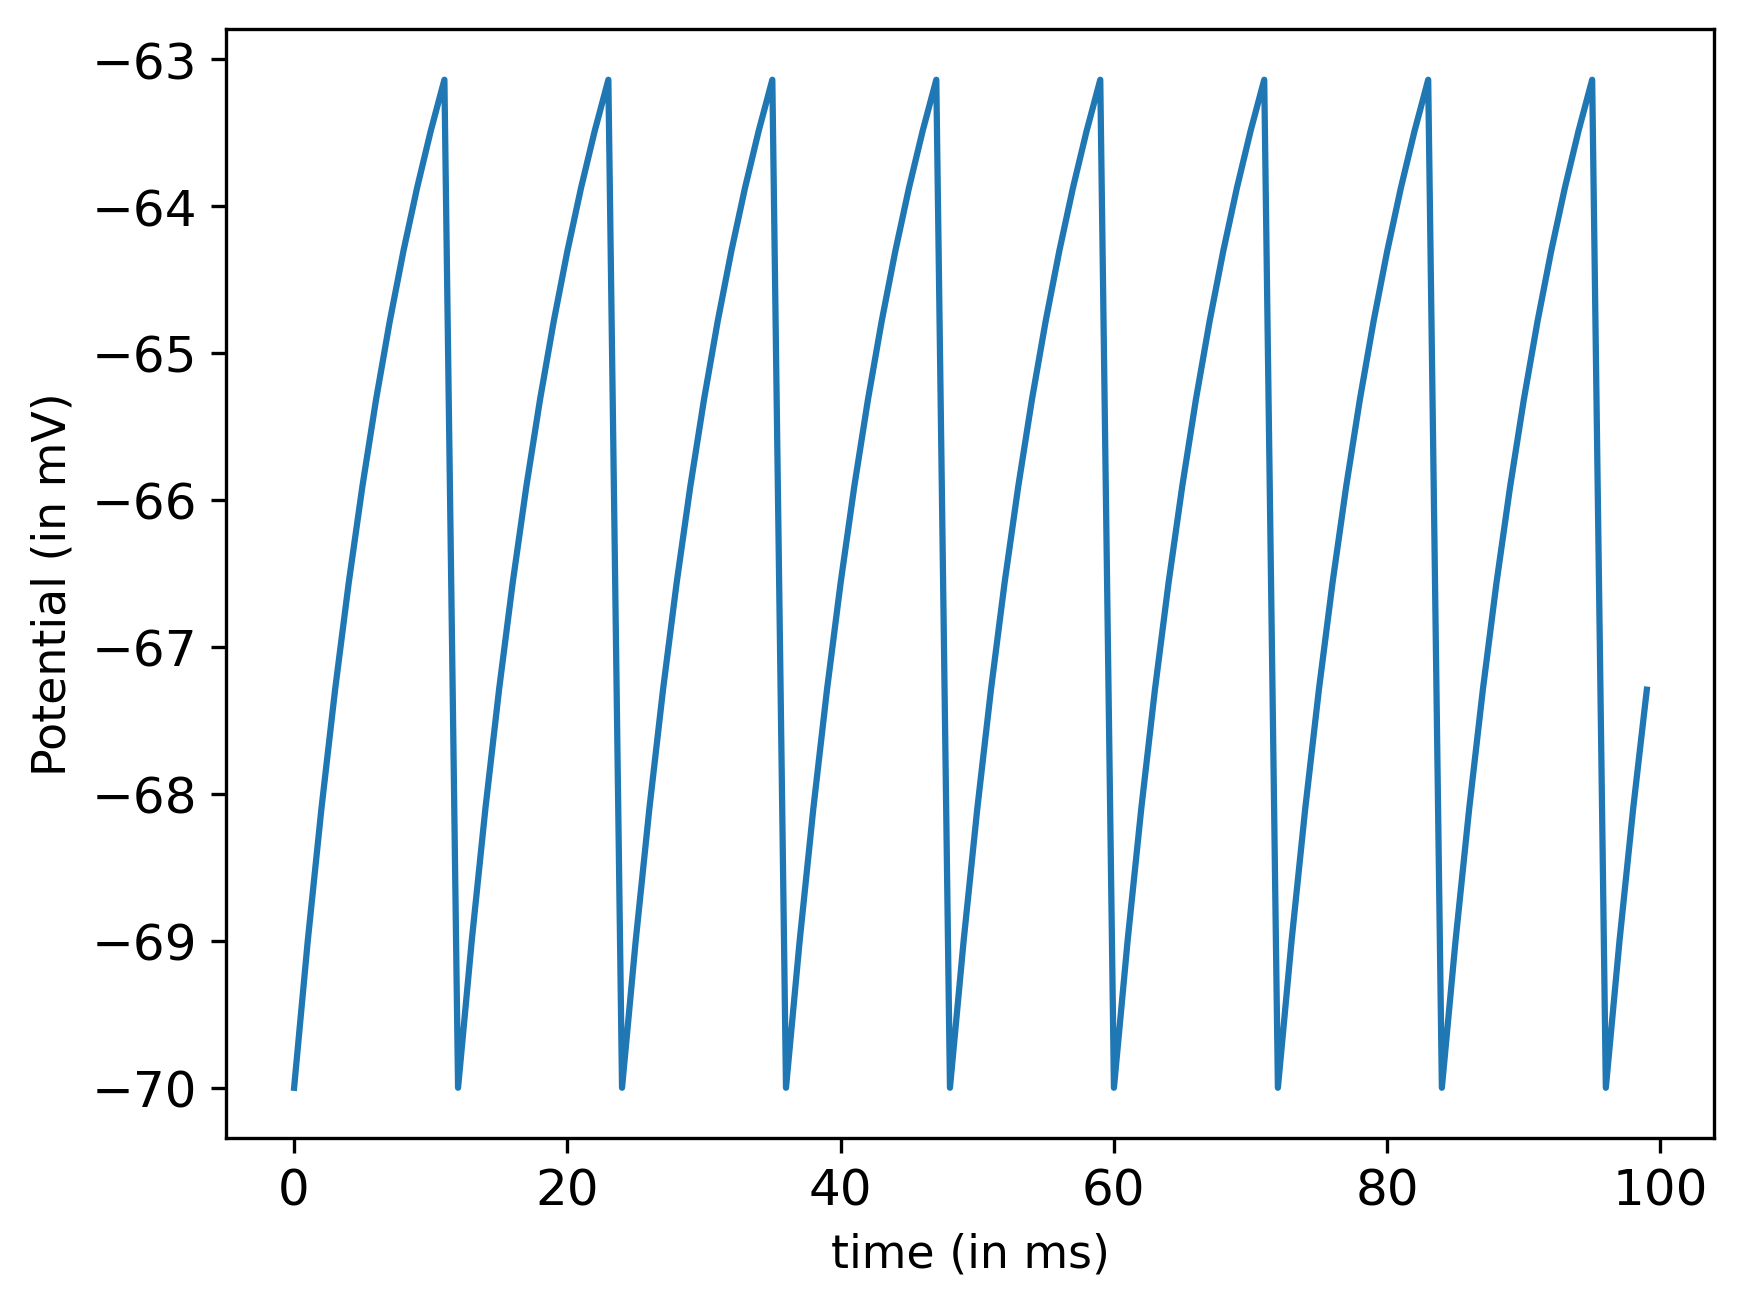

In [8]:
vth = -63

plt.figure(dpi = 300)
C = 1
gl = 0.1
el = -70
deltat = 1
t = 100
I = 1

V = np.zeros(t)

V[0] = el

for step in range(1, t) :
    #your code

    
x = np.linspace(0,100, 200)
plt.plot(V, label = "Euler approximation")
plt.xlabel("time (in ms)")
plt.ylabel("Potential (in mV)")
plt.savefig("eulerSpike.png")
plt.legend()
plt.show()

Change the input current and see how that changes the number of spikes!

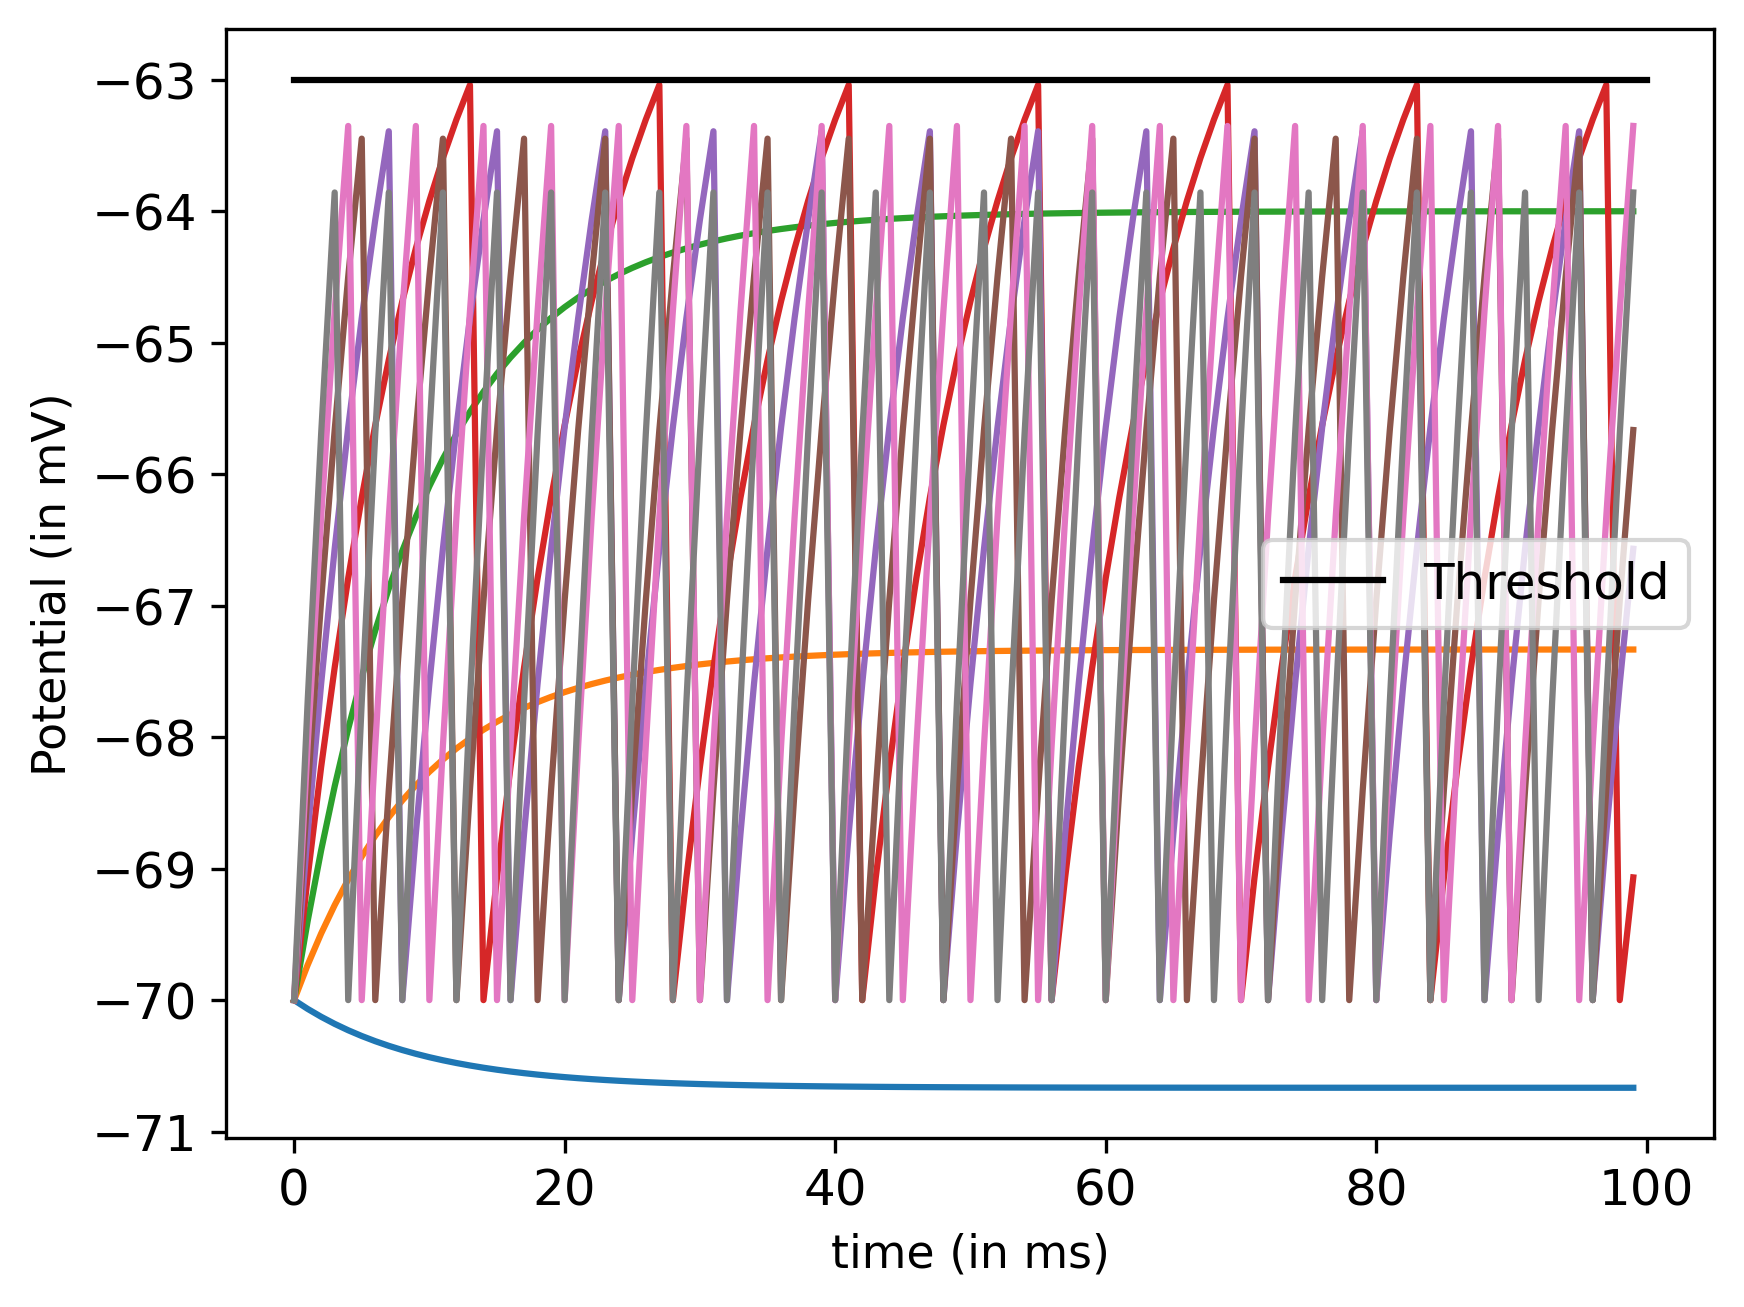

In [9]:
vth = -63

plt.figure(dpi = 300)
C = 1
gl = 0.1
deltat = 1
el = -70
t = 100
I = 1
spike_number = np.zeros(61)
x = np.linspace(0,100, 200)

for I in range(-1, 60) :
    #your code

plt.plot(x, [-63 for i in range(len(x))], color = "black", label = "Threshold")    
plt.xlabel("time (in ms)")
plt.ylabel("Potential (in mV)")
plt.savefig("eulerSpikes.png")
plt.legend()
plt.show()

(e) Plot the tuning curve of this neuron, i.e., the number of spikes within 100ms as a function of
the input current $I$. At what current does the neuron start firing? Which parameters determine the
current threshold?

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  4.  6.  7.  8.  9.
  9. 11. 12. 12. 14. 14. 16. 16. 16. 19. 19. 19. 19. 19. 24. 24. 24. 24.
 24. 24. 24. 24. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 49. 49. 49. 49.]


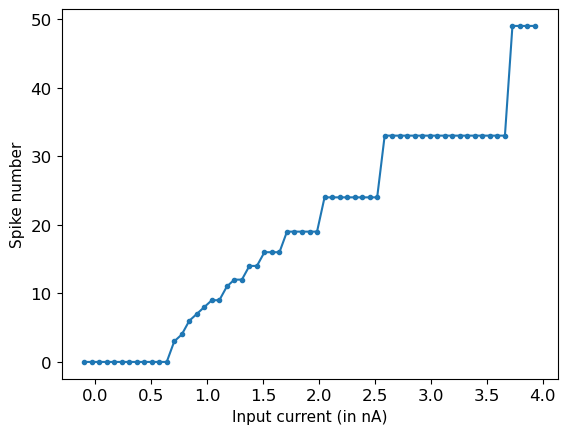

In [10]:
plt.plot(np.linspace(-0.1,3.93, 61), spike_number, '.-')
print(spike_number)
plt.xlabel("Input current (in nA)")
plt.ylabel("Spike number")
plt.savefig("tuningEuler.png")
#plt.grid()
#plt.legend()
plt.show()

(f) How could you introduce a refractory period into the model?

(g) To make the neuron more realistic, we will introduce a white noise term η(t) in the simulation,

$$C \dfrac{dV (t)}{dt} = gL (EL − V (t)) + I + ση(t)$$
where σ determines the magnitude of the noise and $η(t)$ makes the simulation independent of the time
step. (Advanced: why is this necessary?). Create spike trains for varying values of σ.

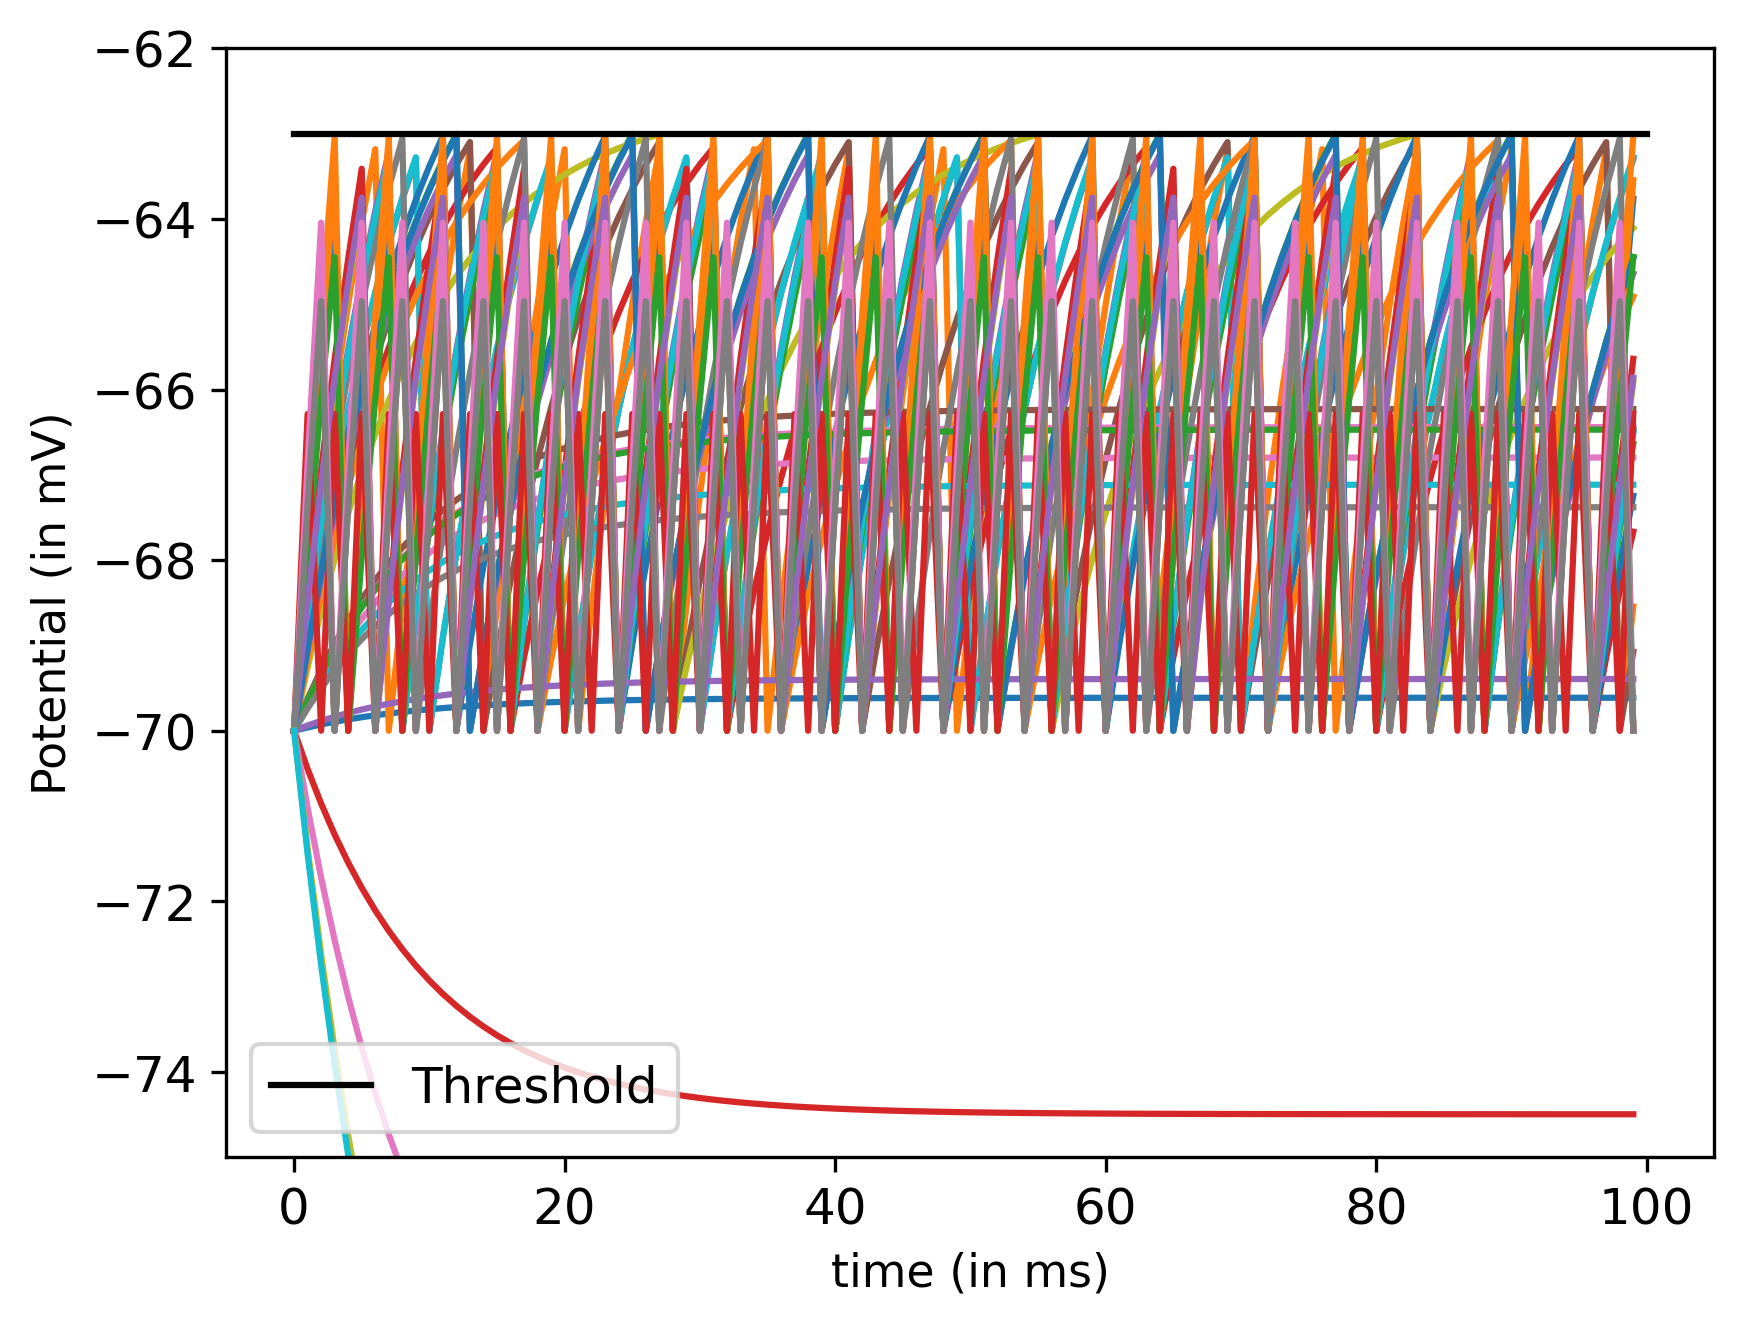

In [11]:
sigma = np.linspace(-1, 3, 40)

vth = -63

plt.figure(dpi = 300)
C = 1
el = -70
gl = 0.1
deltat = 1
t = 100
I = 1
spike_number = np.zeros(40)
x = np.linspace(0,100, 200)
compt = 0
positions = [[]]

for sigm in sigma :
    #your code
    plt.plot(V)
    compt+= 1
    positions.append(position)

plt.plot(x, [-63 for i in range(len(x))], color = "black", label = "Threshold")    
plt.xlabel("time (in ms)")
plt.ylabel("Potential (in mV)")
plt.savefig("sigmaSpike.png")
plt.ylim(-75, -62)
plt.legend()
plt.show()

    

[ 0. 14.  7.  6. 12.  7.  0.  9.  3.  9.  8.  5. 12. 16.  7.  0.  0. 11.
 16.  0. 24. 24.  0.  0.  0. 33.  0.  0. 33. 12.  7. 24. 24. 49. 16. 33.
 33. 33.  0.  0.]


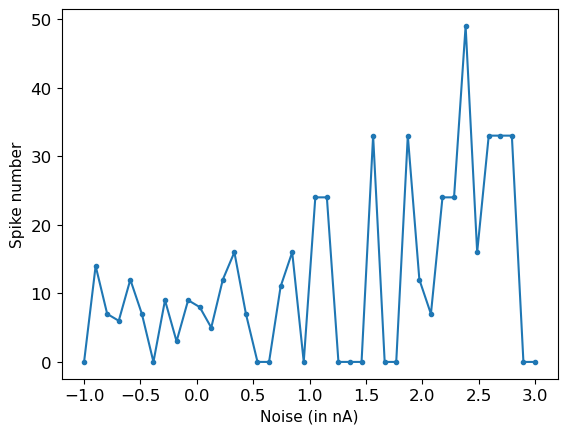

In [12]:
plt.plot(sigma, spike_number, '.-')
print(spike_number)
plt.xlabel("Noise (in nA)")
plt.ylabel("Spike number")
plt.savefig("sigmaTuning.png")
#plt.grid()
#plt.legend()
plt.show()

Make several iteration to understand the odds.

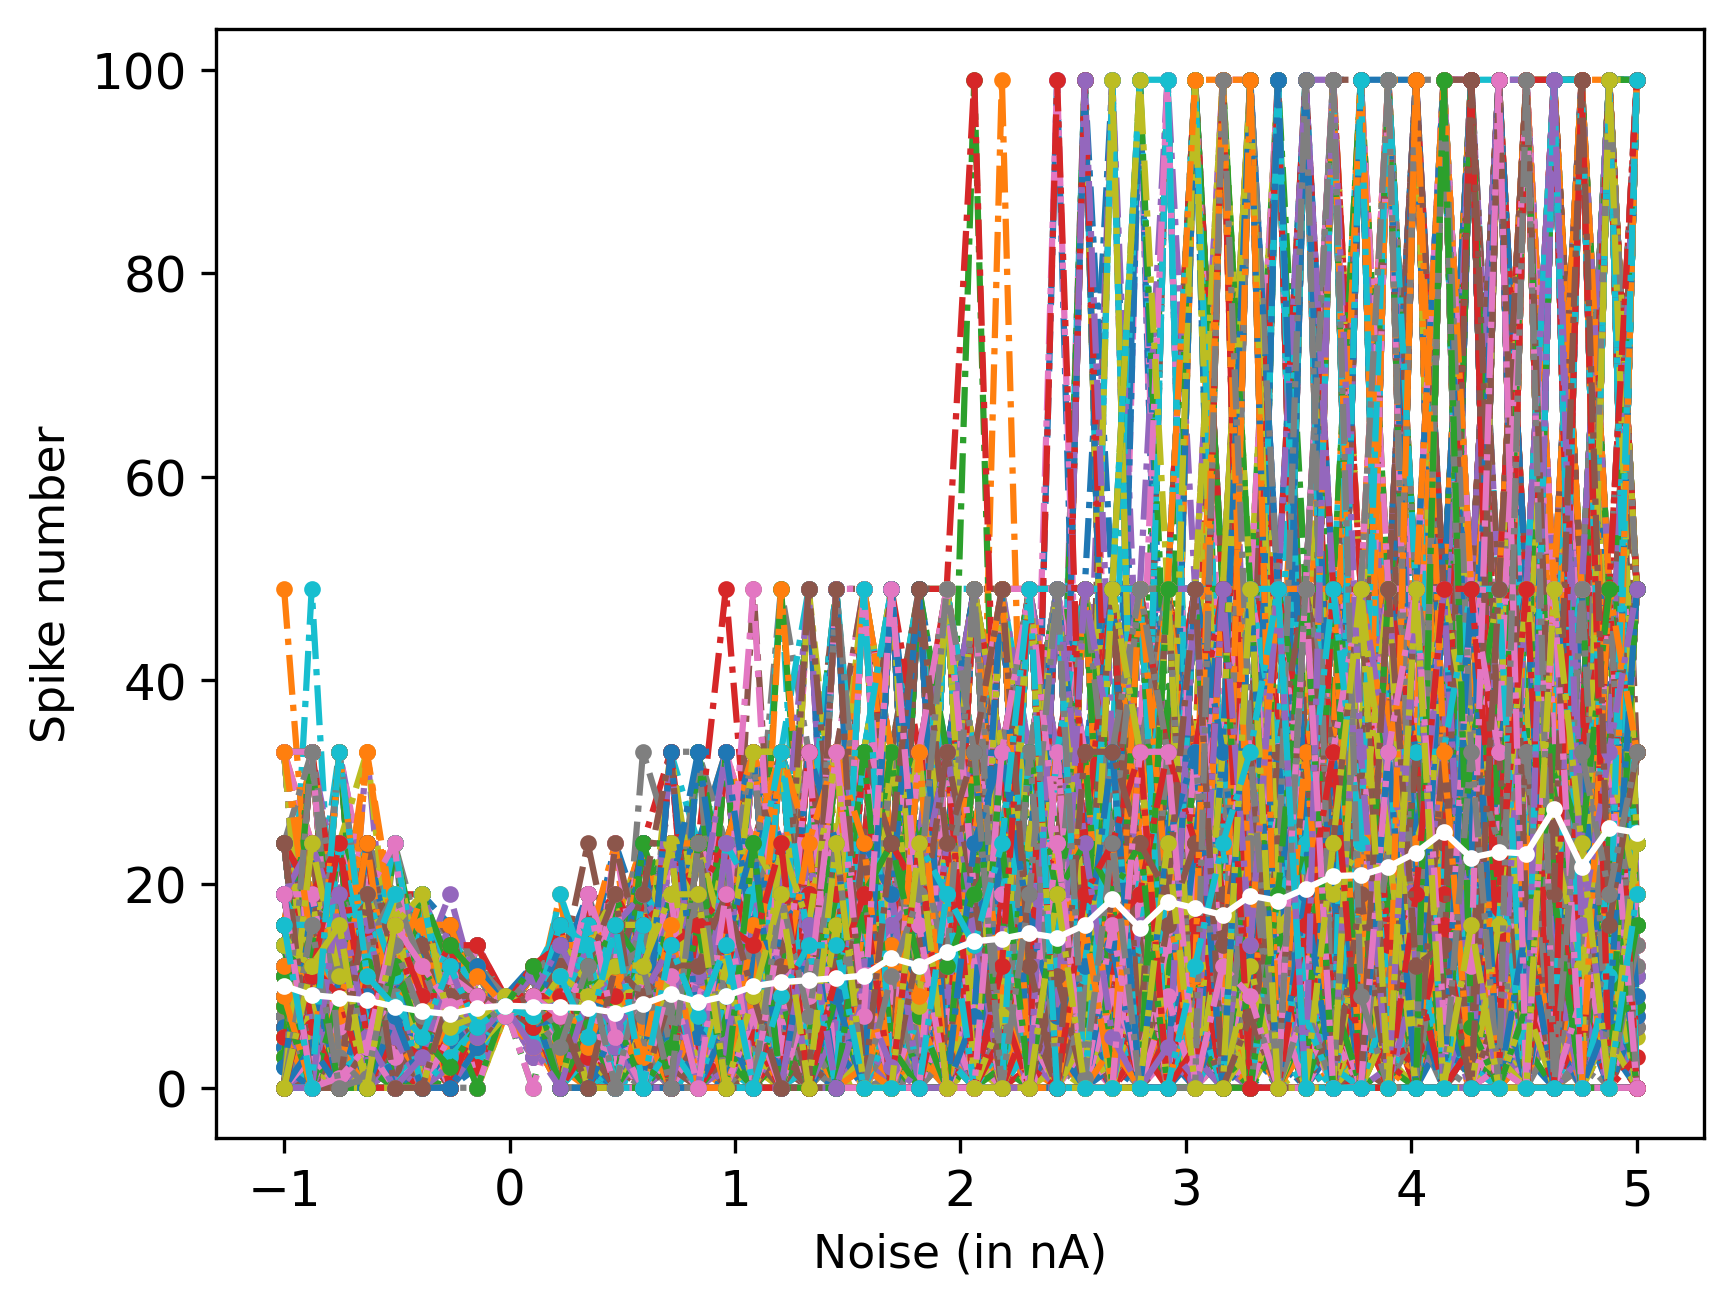

In [13]:
sigma = np.linspace(-1, 5, 50)

vth = -63

plt.figure(dpi = 300)
C = 1
el = -70
gl = 0.1
deltat = 1
t = 100
I = 1
n_test = 500
spike_numbers= np.zeros((n_test, 50))

for test in range(n_test) :
#your code
    
    plt.plot(sigma, spike_number, '.-.')
    #print(spike_number)
    spike_numbers[test] = spike_number
    
#print(spike_numbers)
plt.plot(sigma, np.average(spike_numbers, axis=0), '.-', color = "white")
plt.xlabel("Noise (in nA)")
plt.ylabel("Spike number")
plt.savefig("sigmaTuning.png")
#plt.grid()
#plt.legend()
plt.show()


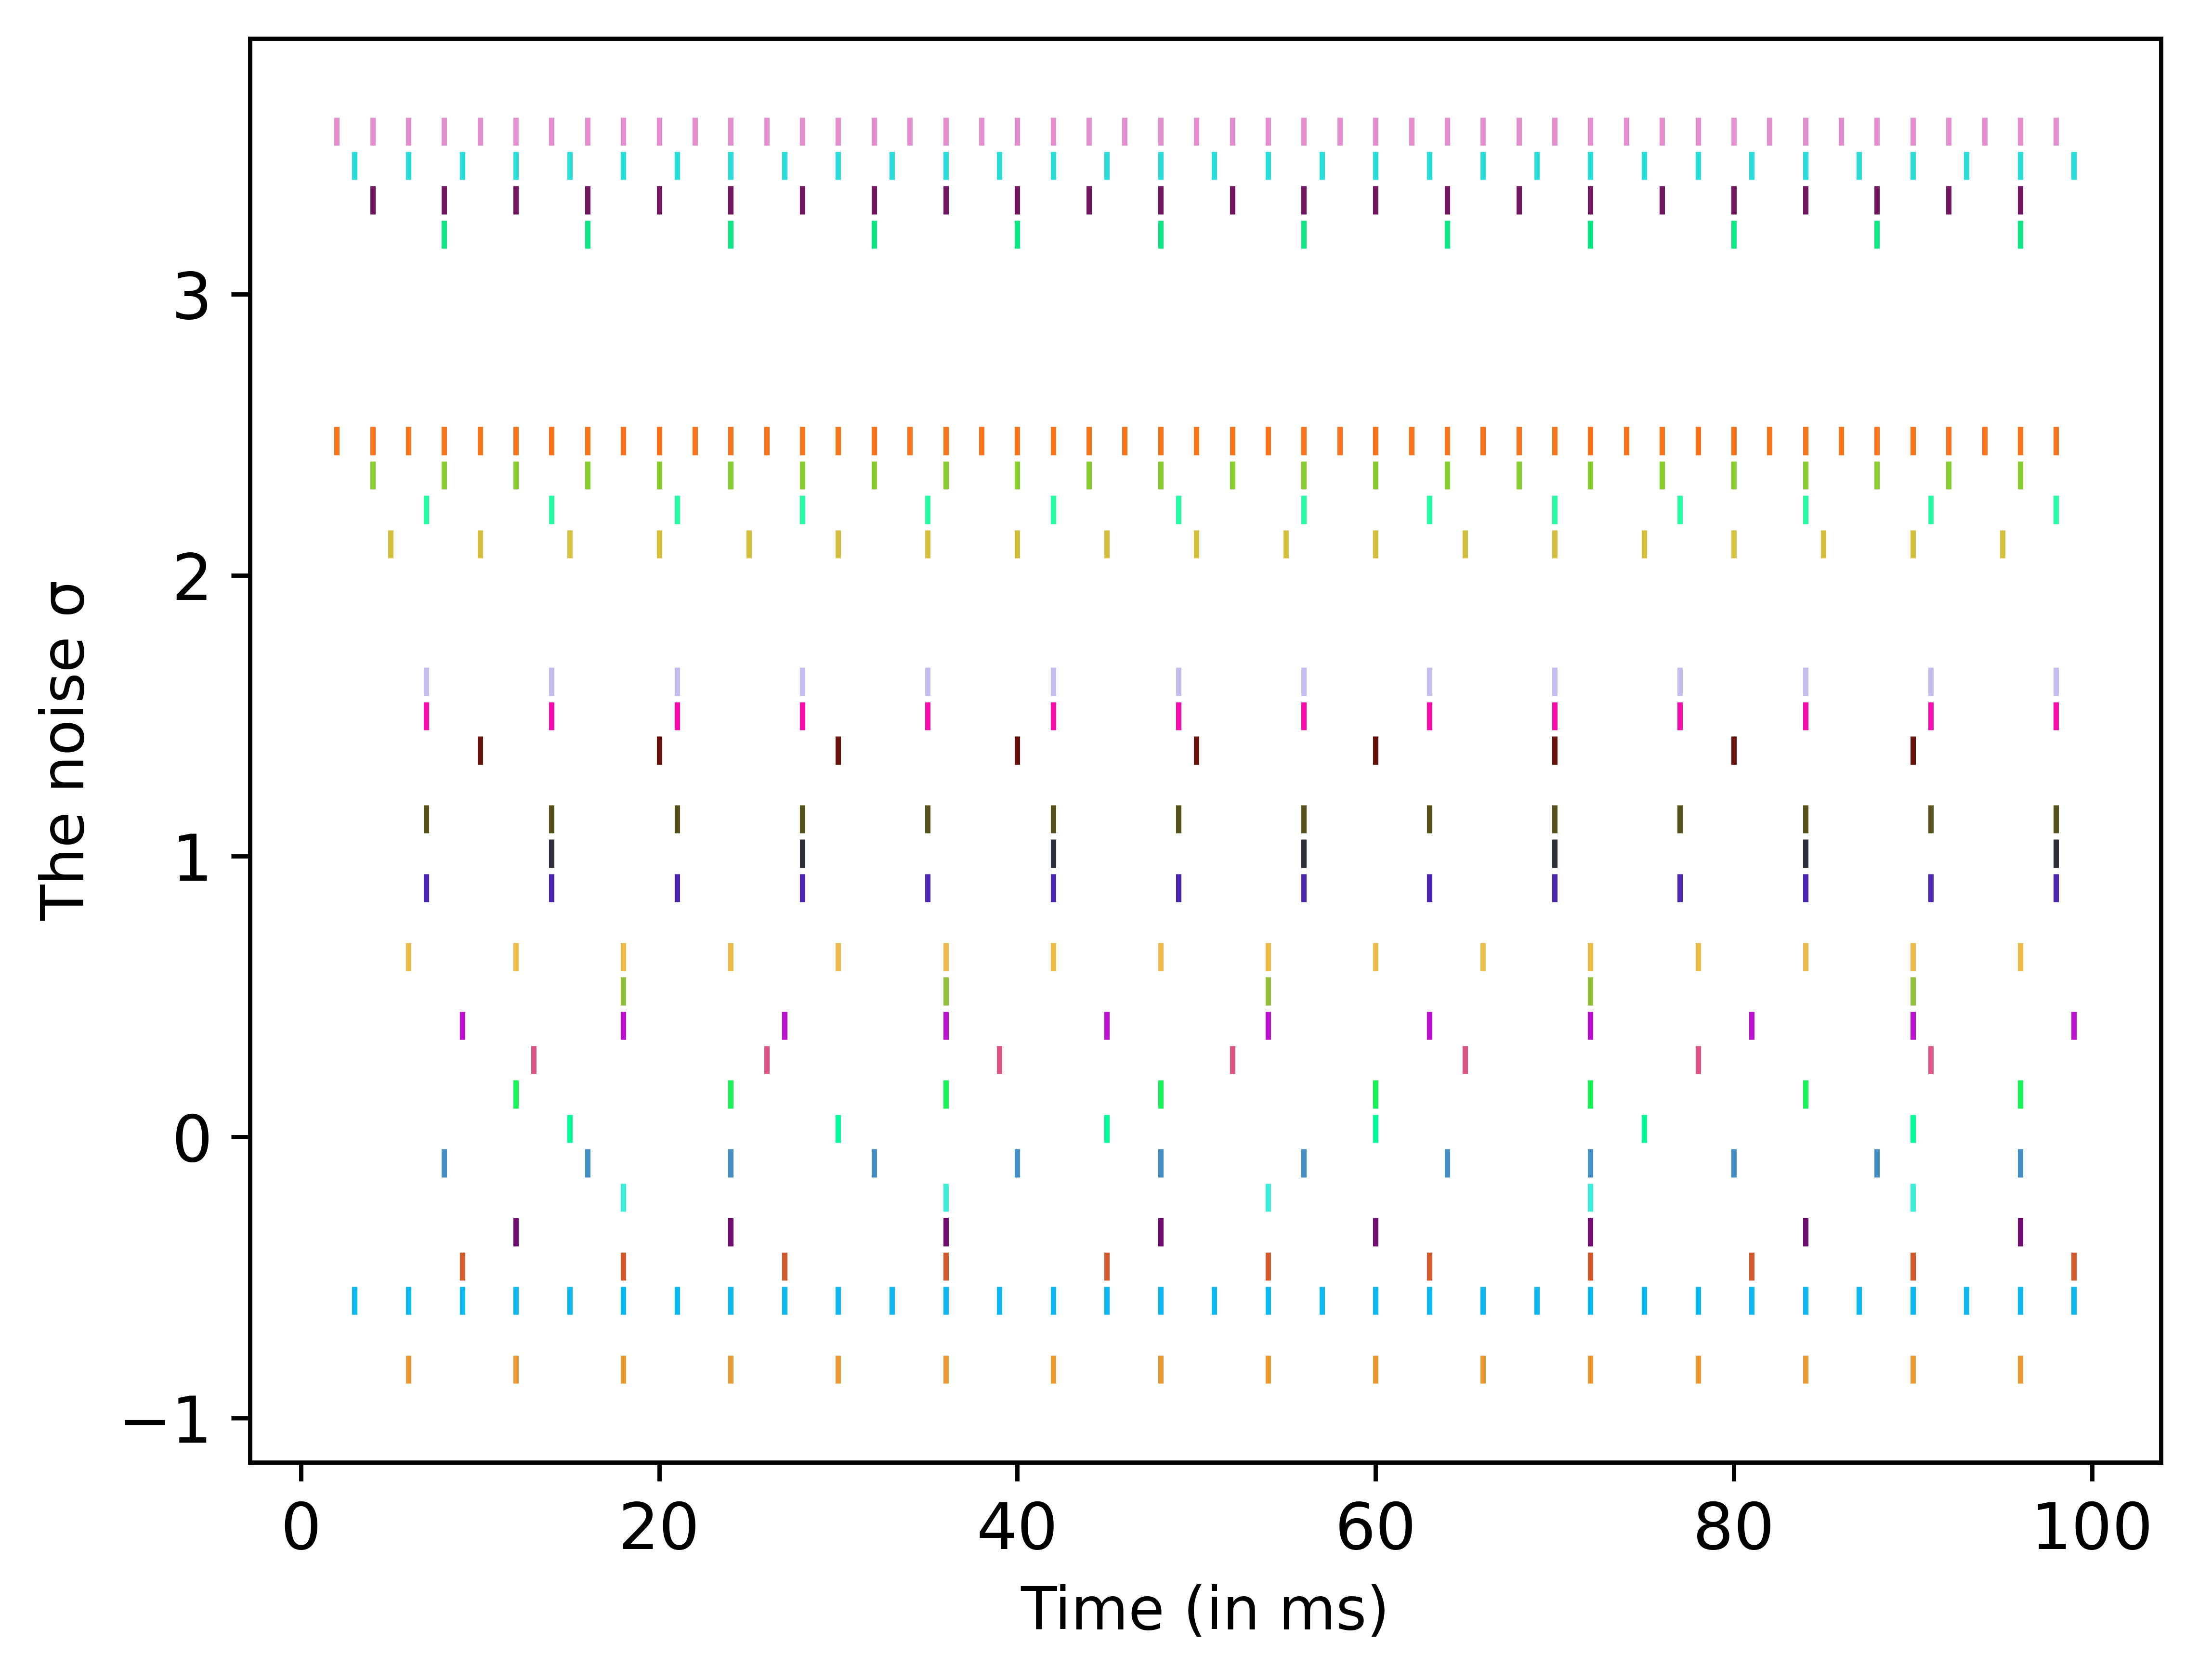

In [14]:
plt.figure(dpi = 800)
compt = 0

for sigm in sigma :
    colorcode = [random.random(), random.random(), random.random()]
    string = "sigma =  " + str(round(sigm,2))
    plt.eventplot(positions[compt], lineoffsets = 0.05 + sigm, linelengths = 0.1, linewidths = 1, color = colorcode)
    compt += 1
            
plt.savefig("spikeSigma.png")
plt.xlabel("Time (in ms)")
plt.ylabel("The noise σ")
#plt.legend()
plt.show()

(h) Advanced: What kind of current input $I(t)$ do you need so that this integrate-and-fire neuron
generates spike trains similar to the one you analyzed in Exercise (2)? Design a current input that
depends on the stimulation frequency f1. Create 10 spike trains for each stimulus frequency, using the
simulation from (f). How does your model compare to the data?

## Exercise 3: Neuron with Autapse

Consider a neuron whose output feeds back onto itself via a synapse. (Such a synapse is often
called an “autapse”.) We assume that the neuron’s firing rate $x$, i.e., its average number of action
potentials per second, is given by the differential equation
$$ \dot{x} (t) = −x(t) + f (wx(t) + I)$$
where $w = 0.04$ is the strength of the synaptic connection and $I = −2$ is some constant, external
(and inhibitory) background input. The input-output (or activation) function of the neuron is given by
a sigmoidal function which we assume to be
$$f (s) = 50(1 + \tanh (s))$$
where $s$ is the total input to the neuron.

(a) Plot the neuron’s activation function $f (s)$ against $s$. Choose a suitable range of inputs.


In [20]:
def f(s) :
    return #your code

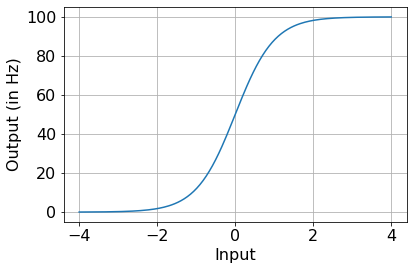

In [21]:
#Ploting the input-output function
s = np.linspace(-4,4, 200)
plt.plot(s, f(s))
plt.xlabel("Input")
plt.ylabel("Output (in Hz)")
plt.grid()
plt.tight_layout()
plt.savefig("Input-output.png", bbox_inches = 'tight')
plt.show()

(b) Plot the derivatives $\dot{x}$ as a function of the neuron’s firing rate $x$. What do the zero-crossings of
this plot indicate?

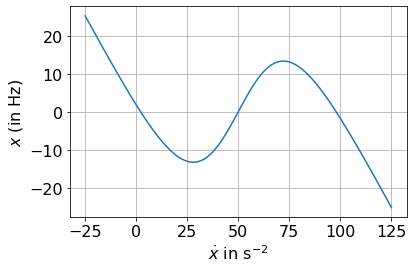

In [22]:
w = 0.04
I = -2

def xp(x) :
    return #your code

#Ploting the input-output function

x = np.linspace(-25,125, 400)
plt.plot(x, xp(x))
plt.xlabel("$\dot{x}$ in s$^{-2}$")
plt.ylabel("$x$ (in Hz)")
plt.grid()
plt.tight_layout()
plt.savefig("x-xp.png", bbox_inches = 'tight')
plt.show()

(c) Simulate the system for different initial conditions, $x(0) = 49$, $x(0) = 50$, and $x(0) =51$, using a time step $dt = 0.1$. Choose a reasonable value of $T$ , What are the outcomes of these
simulations? Why?

In [23]:
x0 = np.array([49, 50, 51])
dt = 0.1
T = 100

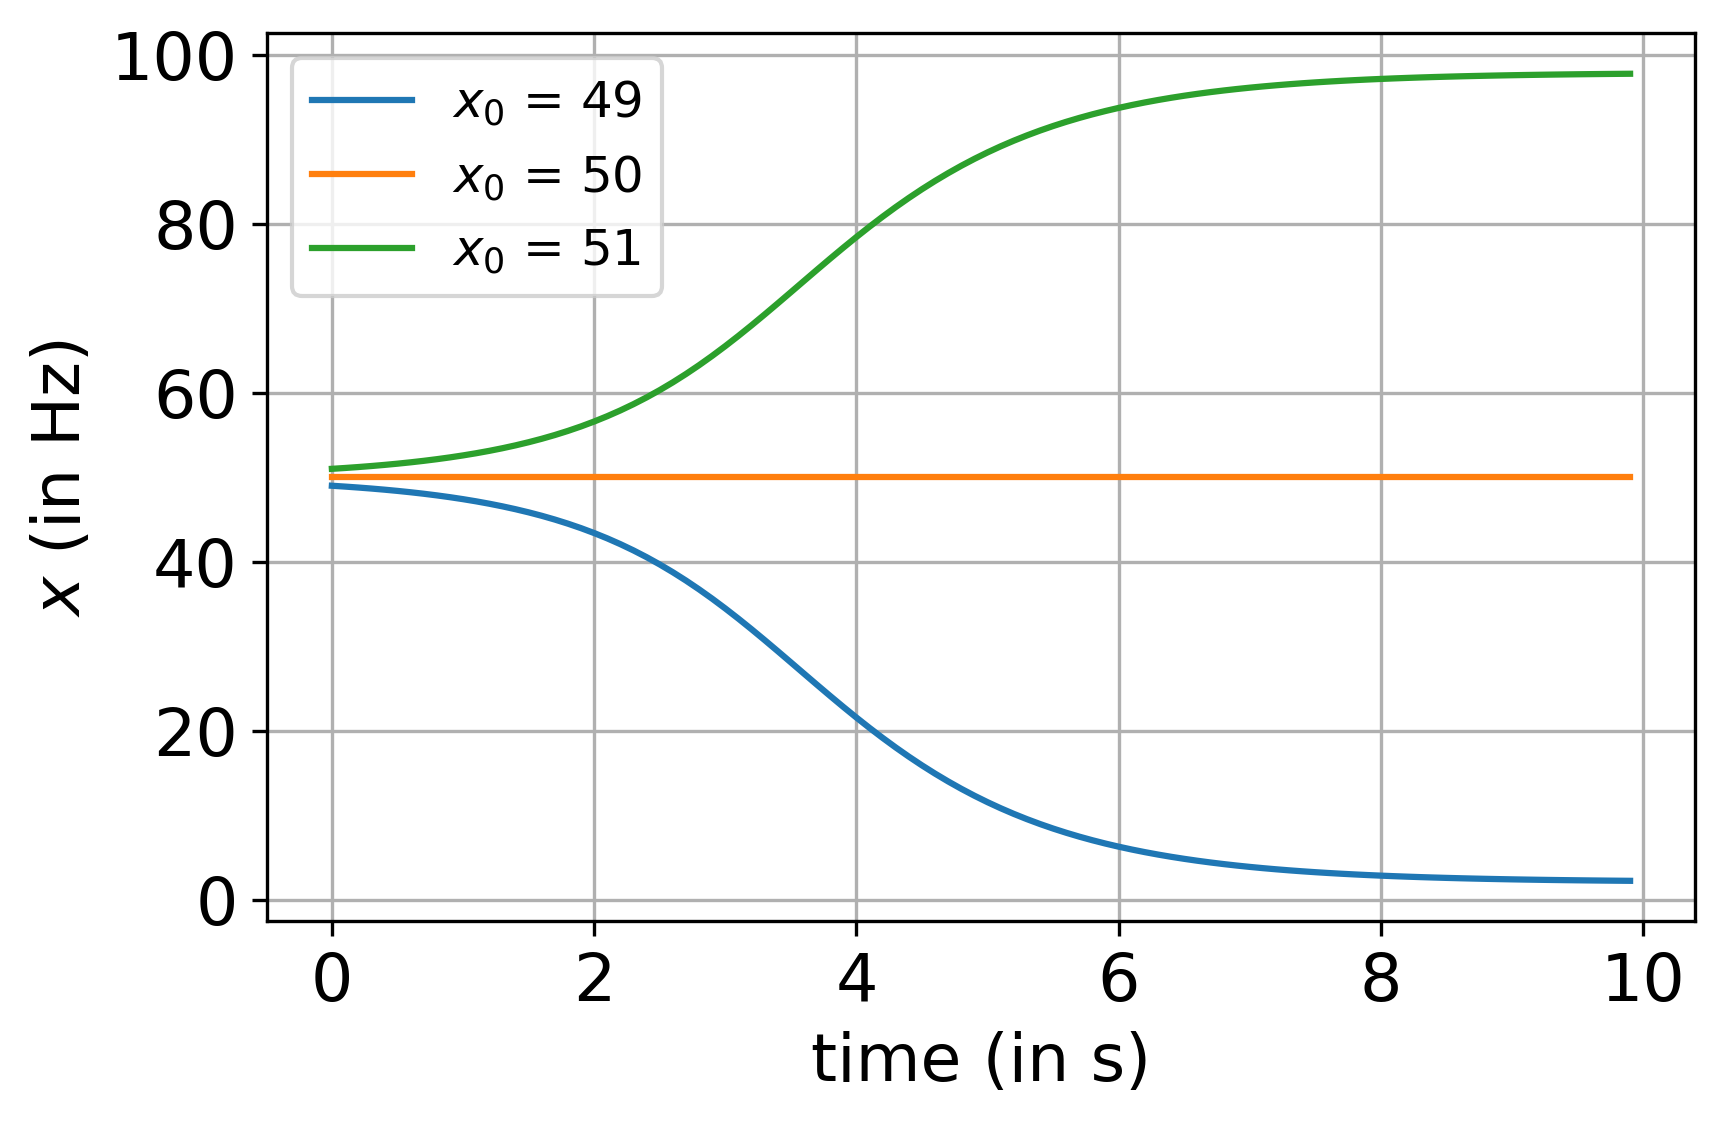

In [24]:
plt.figure(dpi = 300)
for init in x0 :
    #your code
    plt.plot(t, x, label=char)
    
    
plt.legend()
plt.grid()
plt.savefig("x(t).png", bbox_inches = 'tight')
plt.xlabel("time (in s)")
plt.ylabel("$x$ (in Hz)")
plt.tight_layout()
plt.show()


(d) Redo the simulation of (c), but add a noise component to the system, so that
$$ \dot{x} (t) = −x(t) + f (wx(t) + I) + ση(t)$$
where η(t) is Gaussian white noise. What happens for a noise value of σ = 5? 

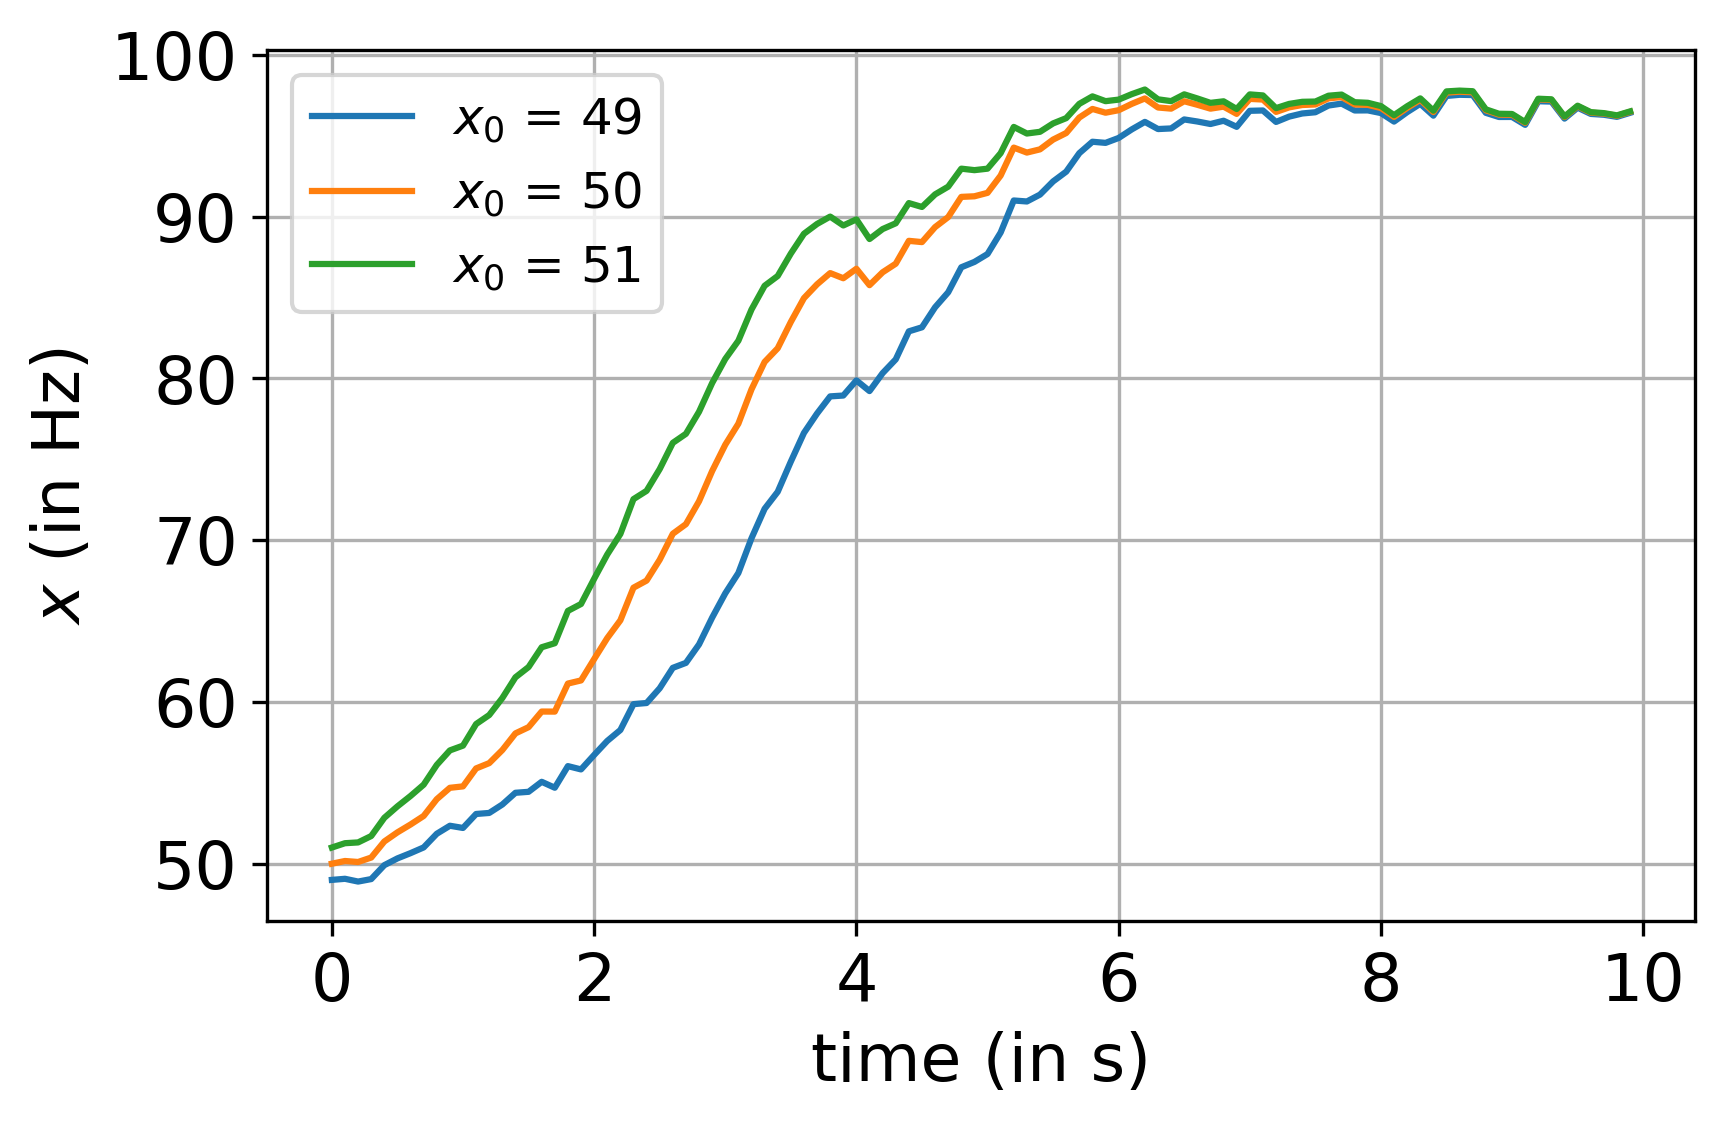

In [25]:
sigma = 5
noise = sigma * np.random.normal(0, 1, size=T)

plt.figure(dpi = 300)
for init in x0 :
    #your code
    plt.plot(t, x, label=char)
    
plt.legend()
plt.grid()
plt.savefig("x_noise.png", bbox_inches = 'tight')
plt.xlabel("time (in s)")
plt.ylabel("$x$ (in Hz)")
plt.tight_layout()
plt.show()

What happens if you
increase the noise (up to σ = 80)? Why?

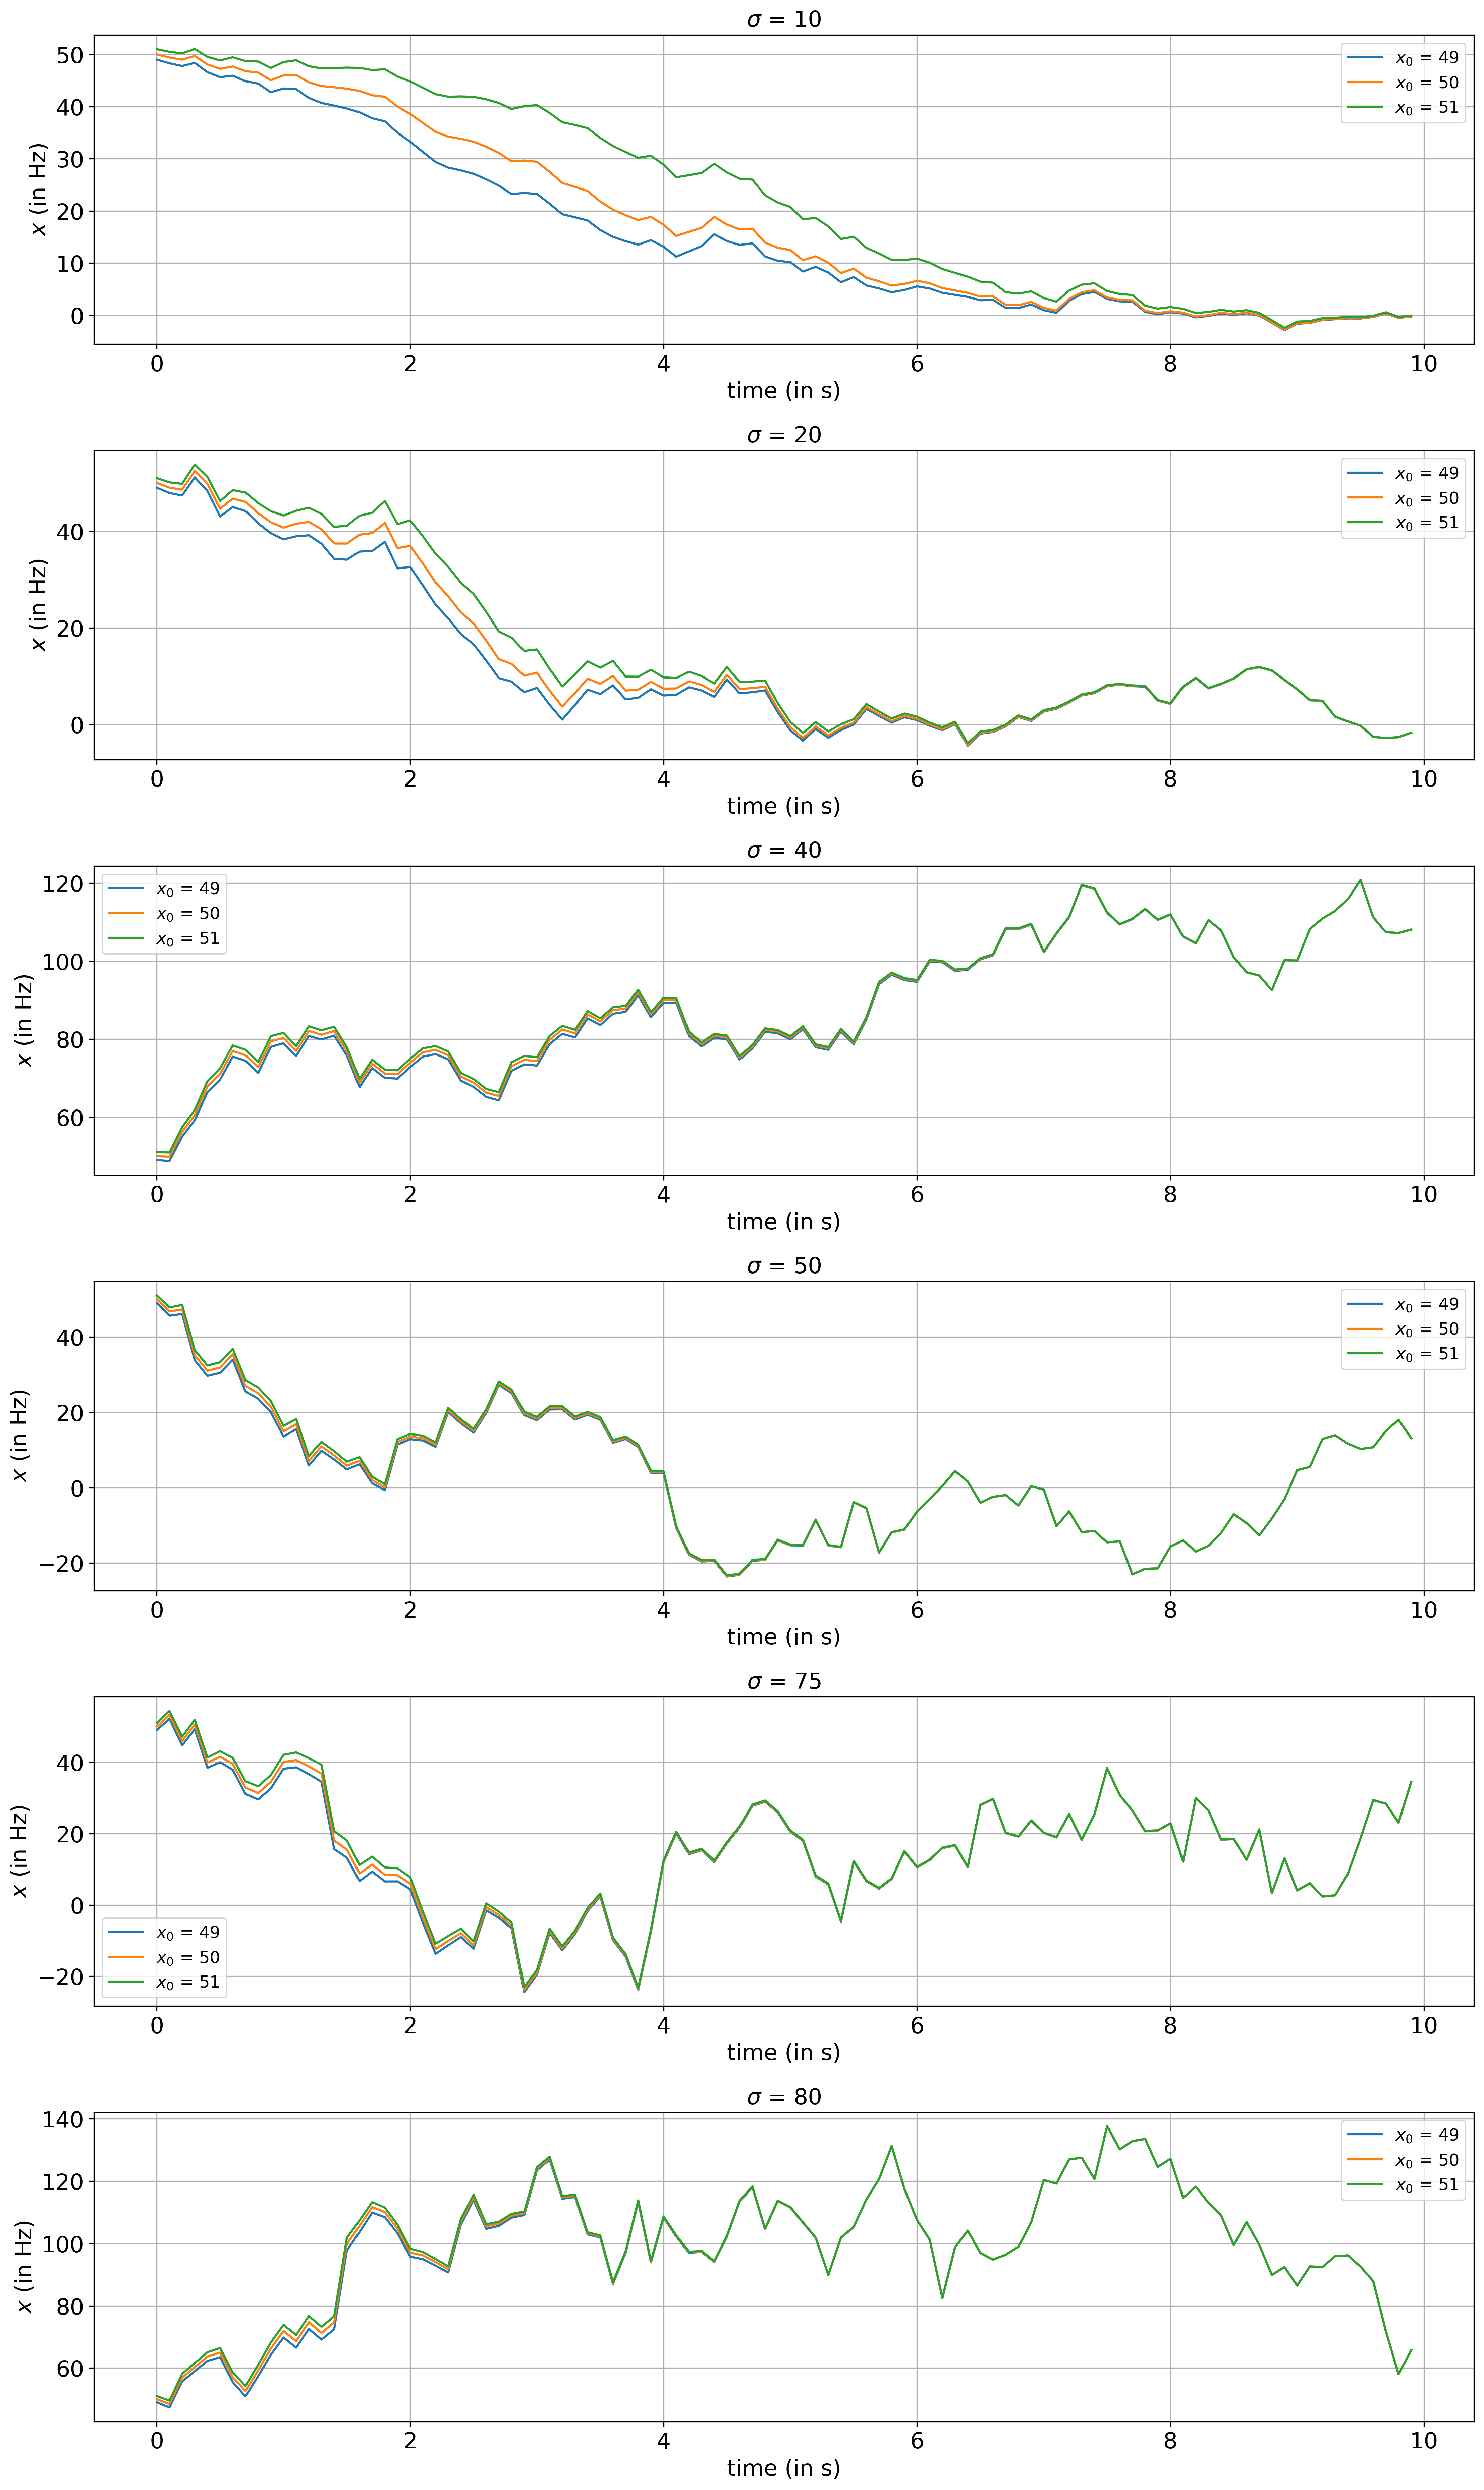

In [26]:
sigma = np.array([10, 20, 40, 50, 75, 80])
numb = len(sigma)

plt.figure(figsize=(15, 25), dpi = 300)
for fig in range(numb) :
    #your code
    
    for init in x0 :
        #your code
        plt.plot(t, x, label=char)
        
    plt.legend()
    plt.grid()
    plt.xlabel("time (in s)")
    plt.ylabel("$x$ (in Hz)")
    plt.title("$\sigma$ = " + str(sigma[fig]))

plt.savefig("x_multinoise.png", bbox_inches = 'tight')
plt.subplots_adjust(bottom=1, right=0.8, top=3)
plt.tight_layout()
plt.show()

## Exercise 4: Circuit with mutual inhibition

We now consider a circuit of two neurons that are coupled by mutual inhibition. For the firing
rates of these two neurons, x1 and x2, we assume the differential equations
$$ \dot{x}_1 (t) = −x_1(t) + f (wx_2(t) + I)$$
$$ \dot{x}_2(t) = −x_2(t) + f (wx_1(t) + I$$

where $f (·)$ is defined as before and the inhibitory synaptic weights are given by $w = −0.1$. The
external inputs are assumed to be excitatory, $I = 5$.

(a) Plot the null-isoclines (“nullclines”) of the system, i.e., the line for which $\dot{x}_1(t) = 0$ and the
line for which $\dot{x}_2(t) = 0$. What do the crossing points of these lines indicate?

In [10]:
w = -0.1
I = 5

def xp1(x1, x2) :
    return #your code

def xp2(x1, x2) :
    return #your code

In [11]:
#We will make 3D plots !

from mpl_toolkits.mplot3d import Axes3D

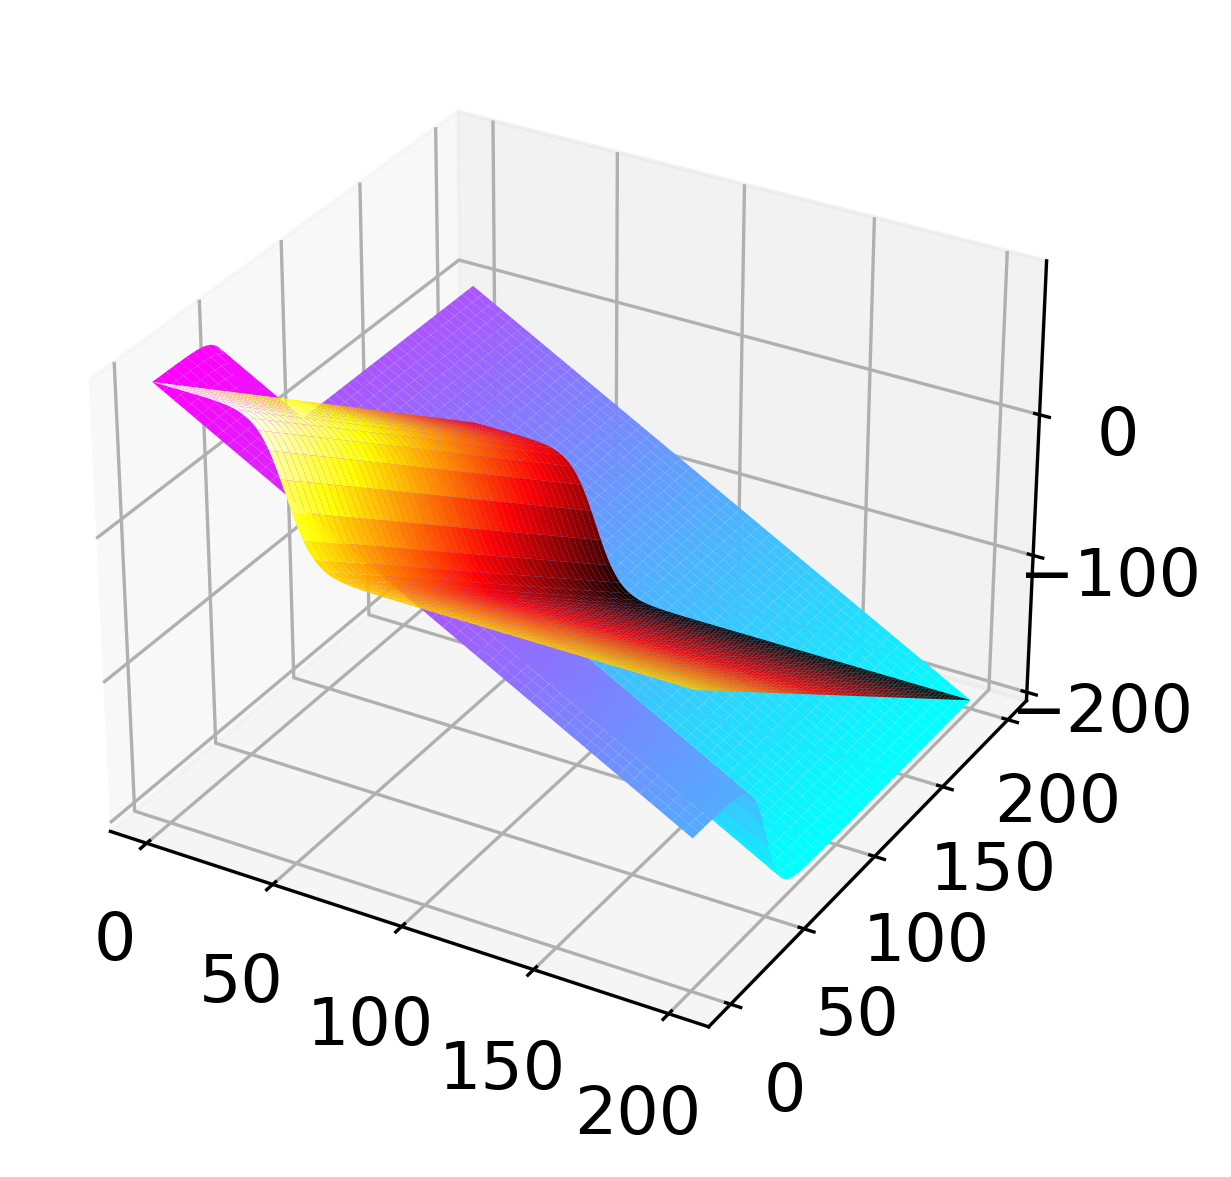

In [12]:
fig=plt.figure(dpi = 300)
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
X1 = np.linspace(0, 200, 300)
X2 = np.linspace(0, 200, 300)
x1, x2 = np.meshgrid(X1, X2)
ax.plot_surface(x1, x2, xp1(x1, x2), cmap = "cool")
ax.plot_surface(x1, x2, xp2(x1, x2), cmap = "hot")
plt.tight_layout()

plt.show()

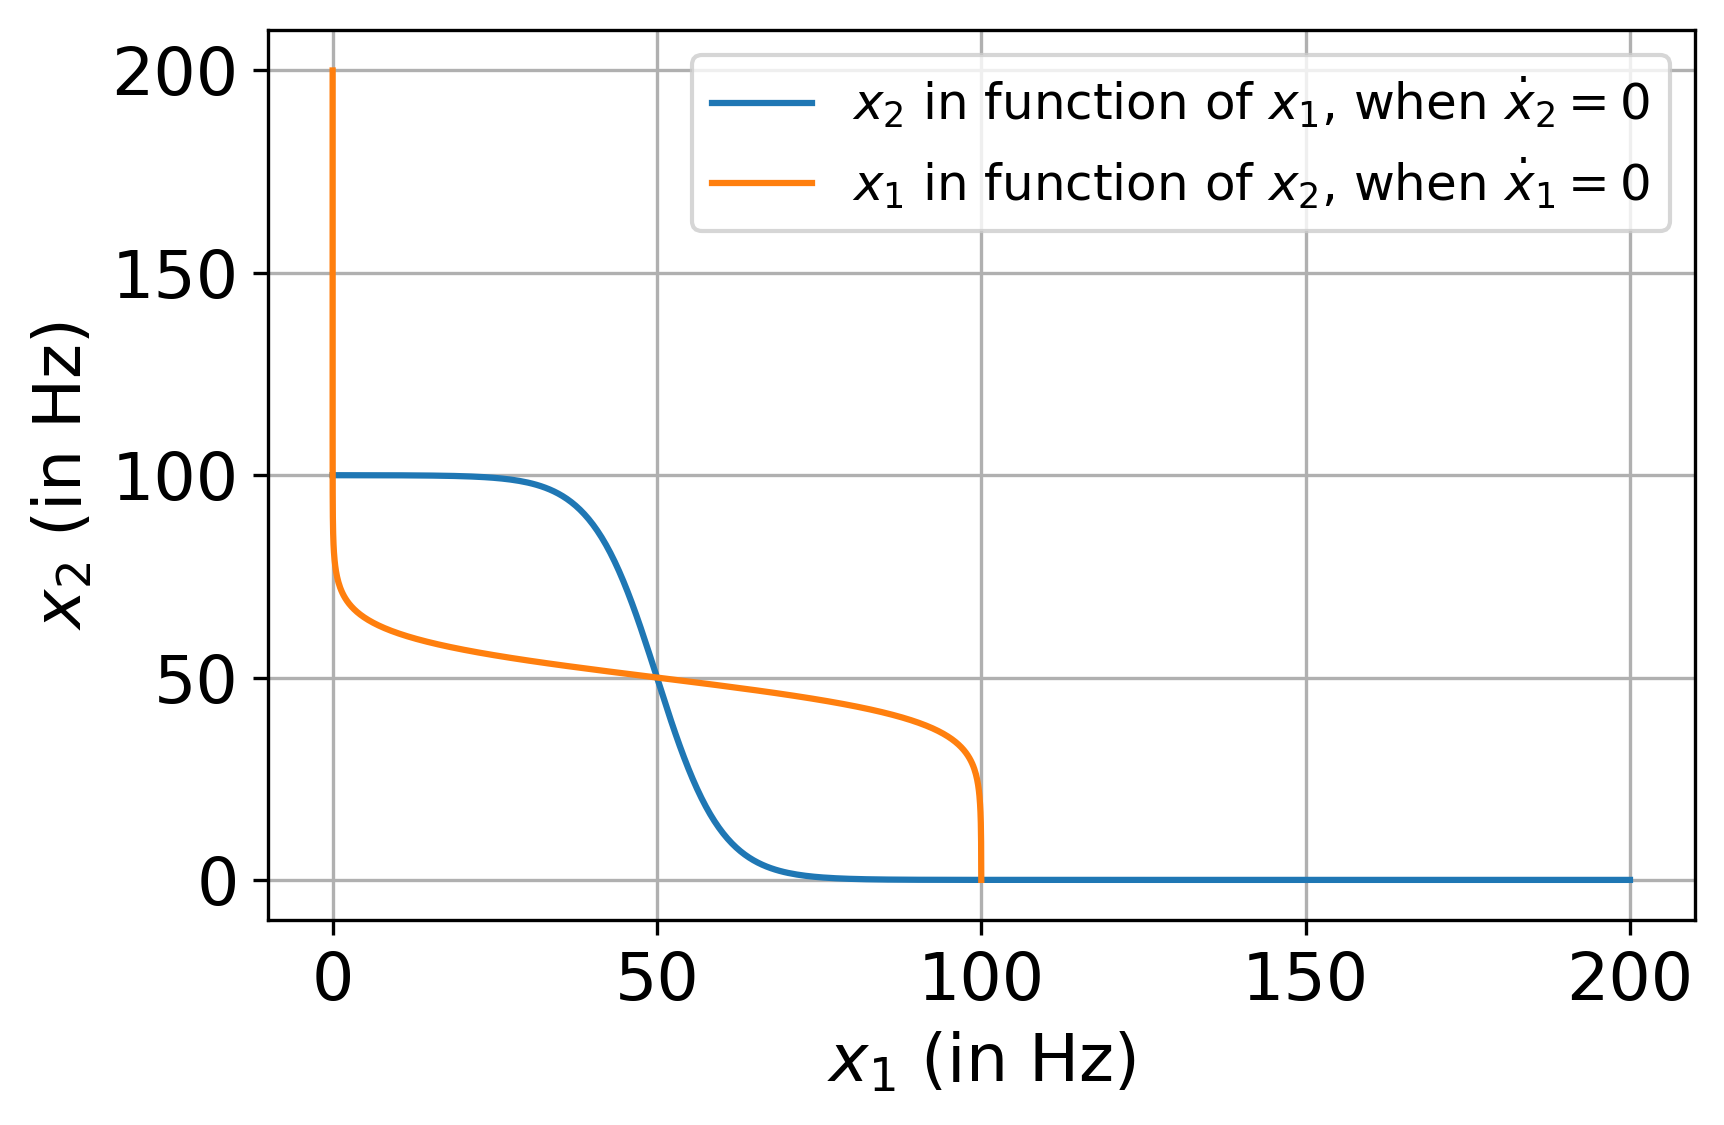

In [13]:
# Let now plot the nul lines

plt.figure(dpi = 300)

#your code

plt.rc('legend', fontsize=12)    # legend fontsize

plt.plot(x1, x20(x1), label="$x_2$ in function of $x_1$, when $\dot{x}_2 = 0$")
plt.plot(x10(x2), x2 , label="$x_1$ in function of $x_2$, when $\dot{x}_1 = 0$")
plt.xlabel("$x_1$ (in Hz)")
plt.ylabel("$x_2$ (in Hz)")
plt.savefig("null-iso.png", bbox_inches = 'tight')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

(b) Simulate the system (time step $dt = 0.1$)! Choose an initial condition for $x_1(0)$ and $x_2(0)$ and
plot the evolution of the firing rates of the two neurons into the same plot as the nullclines from (a).

What happens for different initial conditions?


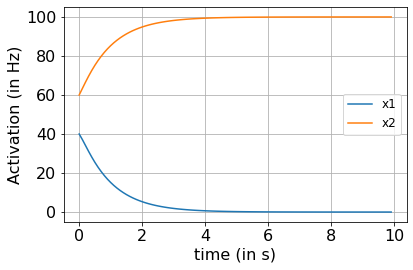

In [14]:
init1 = 40
init2 = 60

#your code


plt.plot(t, x1, label="x1")
plt.plot(t, x2, label="x2")

    
plt.legend()
plt.grid()
plt.savefig("x1-x2-4060.png", bbox_inches = 'tight')
plt.xlabel("time (in s)")
plt.ylabel("Activation (in Hz)")
plt.savefig("bi-plot.png")
plt.tight_layout()

plt.show()

(c) So far we have treated each neuron separately, i.e., each neuron got its own equation. When
we use matrix-vector notation, we can summarize these two equations into one:
$$\dot{x}(t) = −x(t) + f (W x(t) + I)$$
where

$\mathbf{x}(t) =\left( 
\begin{array}{c}
x_1 (t) \\ 
x_2(t)%
\end{array}%
\right)$
    $W = \left( 
\begin{array}{cc}
0 & w \\ 
w & 0%
\end{array}%
\right)$
    $I = \left( 
\begin{array}{c}
I_1 \\ 
I_2 %
\end{array}%
\right)$

We here follow the convention in the literature by which vectors are denoted by bold-faced letters, and
matrices by capitalized letters. Reprogram your program from (b) using Scipy/Numpy’s
intrinsic ability to compute with matrices and vectors! (Note that $\mathbf{x}$ and $\mathbf{I}$ are column-vectors!)

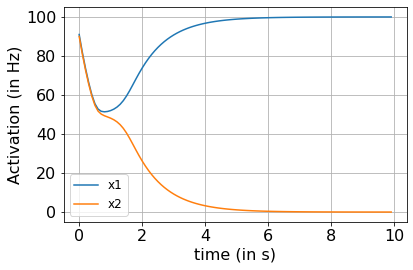

In [18]:
init1 = 91
init2 = 90

#your code

plt.plot(t, Y[0], label="x1")
plt.plot(t, Y[1], label="x2")

    
plt.legend()
plt.grid()
plt.savefig("x1-x2.png", bbox_inches = 'tight')
plt.xlabel("time (in s)")
plt.ylabel("Activation (in Hz)")
plt.tight_layout()
plt.show()

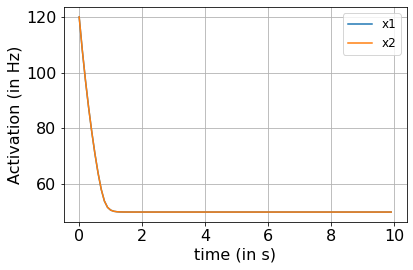

In [16]:
init1 = 120
init2 = 120

#your code

plt.plot(t, Y[0], label="x1")
plt.plot(t, Y[1], label="x2")

    
plt.legend()
plt.grid()
plt.savefig("x1-x2-120120.png", bbox_inches = 'tight')
plt.xlabel("time (in s)")
plt.ylabel("Activation (in Hz)")
plt.tight_layout()
plt.show()

(d) Plotting the vector field of derivatives In addition to the nullclines,
use the Scipy/matplotlib function quiver to plot the vector field of derivatives!

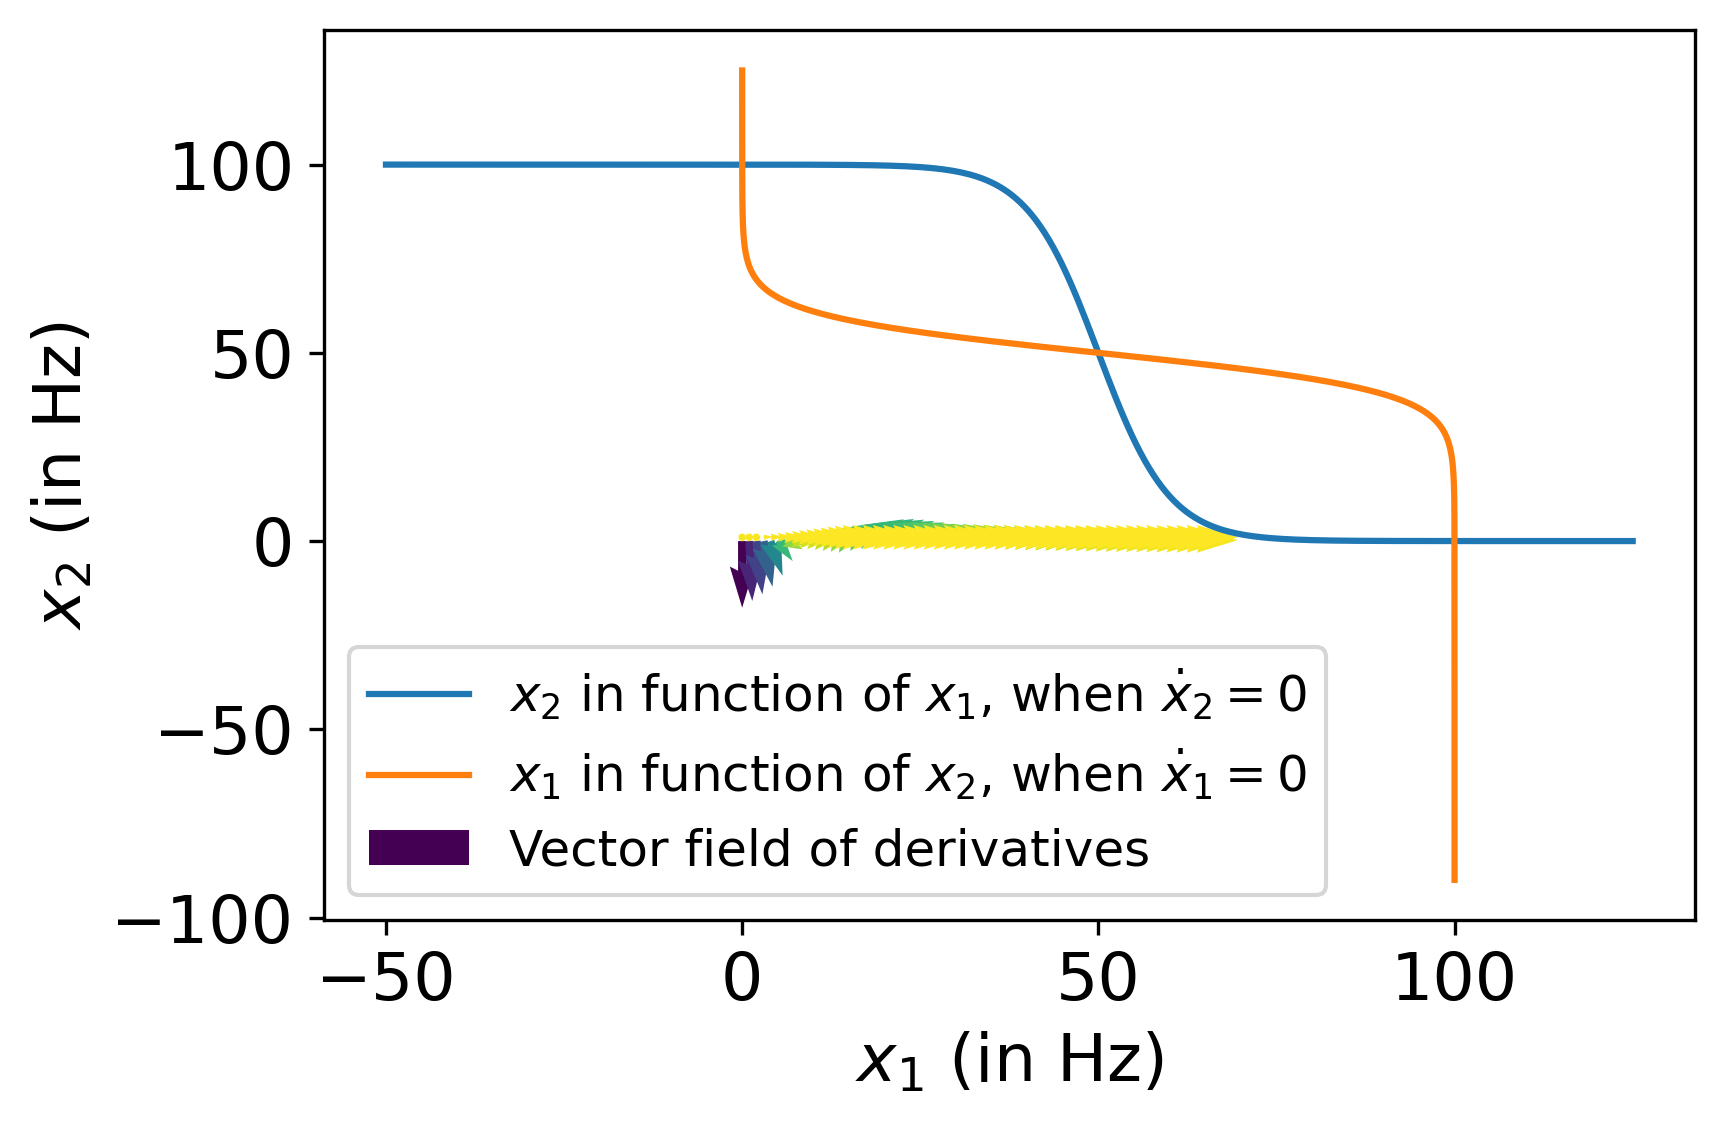

In [19]:
plt.figure(dpi = 300)
#your code

plt.rc('legend', fontsize=12)    # legend fontsize

plt.plot(x1, x20(x1), label="$x_2$ in function of $x_1$, when $\dot{x}_2 = 0$")
plt.plot(x10(x2), x2 , label="$x_1$ in function of $x_2$, when $\dot{x}_1 = 0$")

#your code

x = np.linspace(0, 200, 50)
y = np.linspace(0, 200, 50)

plt.quiver([x, y], dY[0], dY[1], label = "Vector field of derivatives")

plt.xlabel("$x_1$ (in Hz)")
plt.ylabel("$x_2$ (in Hz)")
plt.savefig("vect.png", bbox_inches = 'tight')
plt.legend()
plt.tight_layout()

plt.show()